In [4]:
import sys
sys.path.append('../')
import Phase_Detector.Utility as Utility
import torch

In [4]:
a = []
b = [1,2,3]
a.extend(b)
print(a)

[1, 2, 3]


In [5]:




from torch.nn import CrossEntropyLoss
import torch
loss = CrossEntropyLoss()
print(loss)

CrossEntropyLoss()


In [48]:
y_true = [1,0,0,1,0,0,1,0,0,]
y_pre_tensor = [torch.tensor([0.1,0.8]).reshape(1,2) for i in range(len(y_true))]
metric = Utility.Metrics(2,y_pred=y_pre_tensor, y_true_label=y_true)
#metric.get_accuracy()

Test Dataloader

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
from monai.networks.nets import SwinUNETR
model = SwinUNETR((64,64,64),1,1)
model_dict = torch.load('../../Pre_trained/model_swinvit.pt')

In [15]:
model_dict['state_dict'].keys

odict_keys(['module.patch_embed.proj.weight', 'module.patch_embed.proj.bias', 'module.layers1.0.blocks.0.norm1.weight', 'module.layers1.0.blocks.0.norm1.bias', 'module.layers1.0.blocks.0.attn.relative_position_bias_table', 'module.layers1.0.blocks.0.attn.relative_position_index', 'module.layers1.0.blocks.0.attn.qkv.weight', 'module.layers1.0.blocks.0.attn.qkv.bias', 'module.layers1.0.blocks.0.attn.proj.weight', 'module.layers1.0.blocks.0.attn.proj.bias', 'module.layers1.0.blocks.0.norm2.weight', 'module.layers1.0.blocks.0.norm2.bias', 'module.layers1.0.blocks.0.mlp.fc1.weight', 'module.layers1.0.blocks.0.mlp.fc1.bias', 'module.layers1.0.blocks.0.mlp.fc2.weight', 'module.layers1.0.blocks.0.mlp.fc2.bias', 'module.layers1.0.blocks.1.norm1.weight', 'module.layers1.0.blocks.1.norm1.bias', 'module.layers1.0.blocks.1.attn.relative_position_bias_table', 'module.layers1.0.blocks.1.attn.relative_position_index', 'module.layers1.0.blocks.1.attn.qkv.weight', 'module.layers1.0.blocks.1.attn.qkv.bia

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader

# 定义一个简单的自定义数据集
# 示例数据
data = [i for i in range(10)]  # 一个包含0-9的简单列表

# 创建Dataset
simple_dataset = ImageDataset(data)

# 创建DataLoader
#data_loader = DataLoader(simple_dataset, batch_size=2, shuffle=True)

# 迭代DataLoader
#for batch in data_loader:
 #   print(batch)


c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from torch import tensor
import torch
import nibabel as nib

from torch.utils.data import WeightedRandomSampler

import numpy as np
import pandas as pd
import os
from monai.transforms import Compose

from monai.data import ImageDataset,DataLoader


class Image_Dataset(ImageDataset):
    def __init__(self,image_files,labels,transform_methods=None,data_aug=True,label_name=None,*args,**kwargs):
        """
        args:
            image_files: list of image files path
            labels: list of labels
            transform_methods: list of transform methods
            data_aug: True if data augmentation is used
            label_name: name of the label
        
        """
        if data_aug:
            transform = Compose(transform_methods)
        else:
            transform = None

        super().__init__(image_files=image_files,labels=labels,transform=transform,*args, **kwargs)

    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self,index):
        image = self.image_files[index]
        label = self.labels[index]

        # get image array
        image = nib.load(image).get_fdata()
        # here to do windowing

        image = tensor(image)
        return image,label
    
class Data_Loader(DataLoader):
    def __init__(self,dataset,batch_size,num_workers=0,*args,**kwargs):
        super().__init__(dataset=dataset,batch_size=batch_size,num_workers=num_workers,*args,**kwargs)
    
    
    def build_train_loader(self):
        return DataLoader(self.dataset,batch_size=self.batch_size,shuffle=True,num_workers=self.num_workers,drop_last=True,*self.args,**self.kwargs)

    def build_vali_loader(self):
        return DataLoader(self.dataset,batch_size=self.batch_size,shuffle=False,num_workers=self.num_workers,drop_last=False,*self.args,**self.kwargs)
    
    def build_test_loader(self):
        return DataLoader(self.dataset,batch_size=self.batch_size,shuffle=False,num_workers=self.num_workers,drop_last=False,*self.args,**self.kwargs)


In [12]:
import os
a = os.listdir('../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/')
b = os.listdir('../../Data/CT_Phase/Full_image_Liver_slice/')
a[0:20]

['CILM_CT_101040_0000.nii.gz',
 'CILM_CT_102030_0000.nii.gz',
 'CILM_CT_104550_0000.nii.gz',
 'CILM_CT_104551_0000.nii.gz',
 'CILM_CT_104552_0000.nii.gz',
 'CILM_CT_107850_0000.nii.gz',
 'CILM_CT_107851_0000.nii.gz',
 'CILM_CT_111110_0000.nii.gz',
 'CILM_CT_111111_0000.nii.gz',
 'CILM_CT_111112_0000.nii.gz',
 'CILM_CT_111550_0000.nii.gz',
 'CILM_CT_111551_0000.nii.gz',
 'CILM_CT_111552_0000.nii.gz',
 'CILM_CT_111553_0000.nii.gz',
 'CILM_CT_114470_0000.nii.gz',
 'CILM_CT_114471_0000.nii.gz',
 'CILM_CT_114472_0000.nii.gz',
 'CILM_CT_116560_0000.nii.gz',
 'CILM_CT_116561_0000.nii.gz',
 'CILM_CT_121900_0000.nii.gz']

# Split data

In [32]:
import pandas as pd
data = pd.read_excel('../../slice_data_orig.xlsx')
#random choose 
all_ids = data['study'].unique().tolist()
# random choose 70% as train

import random
random.shuffle(all_ids)
train_ids = all_ids[0:int(len(all_ids)*0.7)]

#random choose 15% as validation

vali_ids = data['study'].unique().tolist()
#first remove train_ids
for i in train_ids:
    vali_ids.remove(i)
random.shuffle(vali_ids)
vali_ids = vali_ids[0:int(len(vali_ids)*0.15)]

#rest as test
test_ids = data['study'].unique().tolist()
for i in train_ids:
    test_ids.remove(i)
for i in vali_ids:
    test_ids.remove(i)
random.shuffle(test_ids)



In [34]:
len(all_ids)

276

In [35]:
train_data = data[data['study'].isin(train_ids)]
vali_data = data[data['study'].isin(vali_ids)]
test_data = data[data['study'].isin(test_ids)]


In [109]:
import numpy as np
loss_value = pd.read_table('../../loss_1.txt',sep=' ',header=None)
len(loss_value)


34

In [112]:

epoch = [i for i in range(1,35)]
tr_loss_raw = loss_value[0].values.tolist()
tr_loss = []

for i in range(1,35):
    tr_loss.append(np.float32(tr_loss_raw[i-1][1:-1]))


val_loss_raw = loss_value[1].values.tolist()
val_loss = []

for i in range(1,35):
    val_loss.append(float(val_loss_raw[i-1][0:-1]))
    


In [326]:
import skimage
img_dicom = skimage.io.imread('../0.png')
img_nifiti = skimage.io.imread('../Study_0_Slice_75.png')
img_nifiti = np.rot90(img_nifiti,3)
img_nifiti = np.flip(img_nifiti,(0,1))


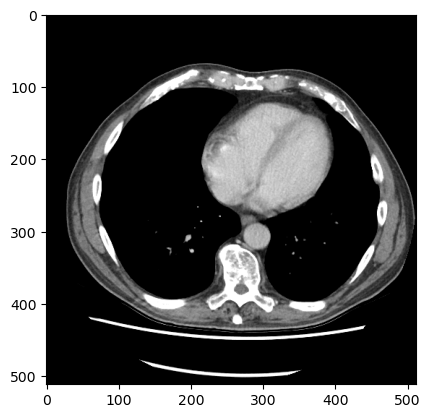

In [327]:
plt.imshow(img_nifiti[:,:,0],cmap='gray')

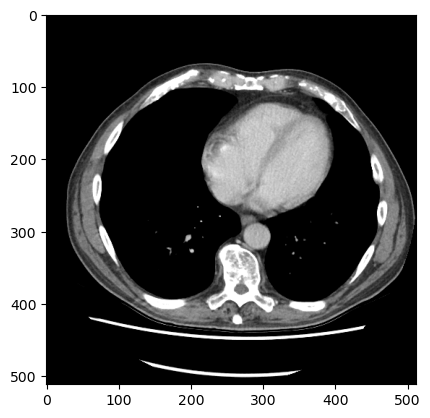

In [296]:
import matplotlib.pyplot as plt

plt.imshow(img_dicom,cmap='gray')

In [368]:
a = img_nifiti[68,211,0] -img_dicom[68,211]

img_nifiti[68,211,0] - img_dicom[68,211]


C:\Users\098986\AppData\Local\Temp\ipykernel_4716\369457355.py:1: RuntimeWarning: overflow encountered in scalar subtract
  a = img_nifiti[68,211,0] -img_dicom[68,211]
C:\Users\098986\AppData\Local\Temp\ipykernel_4716\369457355.py:3: RuntimeWarning: overflow encountered in scalar subtract
  img_nifiti[68,211,0] - img_dicom[68,211]


255

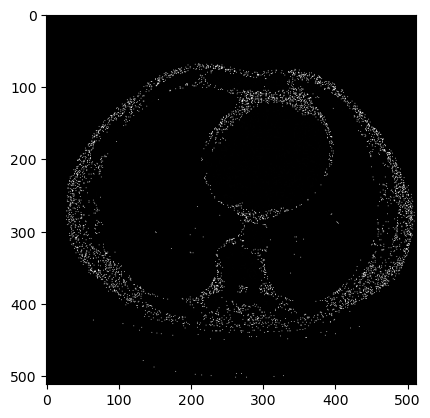

In [337]:
plt.imshow(img_nifiti[:,:,0]-img_dicom,cmap='gray')

In [353]:
a[68,212]

255

In [352]:
a = abs((img_dicom - img_nifiti[:,:,0]))

#the index of the max difference

np.where(a==a.max())

(array([ 68,  68,  68, ..., 502, 502, 502], dtype=int64),
 array([212, 216, 224, ..., 292, 293, 295], dtype=int64))

0

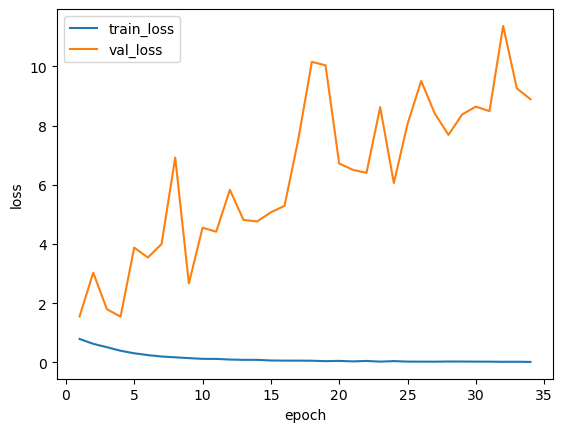

In [113]:
# plot loss
import matplotlib.pyplot as plt
plt.plot(epoch,tr_loss,label='train_loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Use simple ITK

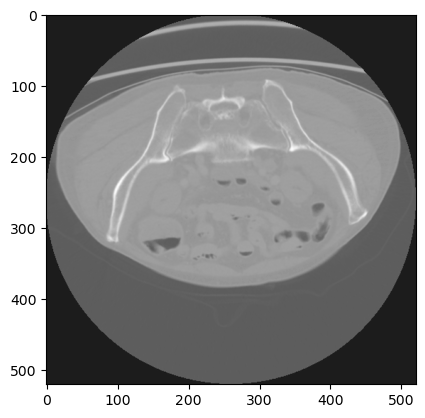

In [167]:
import SimpleITK
import matplotlib.pyplot as plt
#read image
image = SimpleITK.ReadImage('../../Data/CT_Phase/Full_Image_Liver_07075/CILM_CT_101040_0000.nii.gz')

#get array

image.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))
image_array = SimpleITK.GetArrayFromImage(image)
image_array.shape
plt.imshow(image_array[50,:,:],cmap='gray')



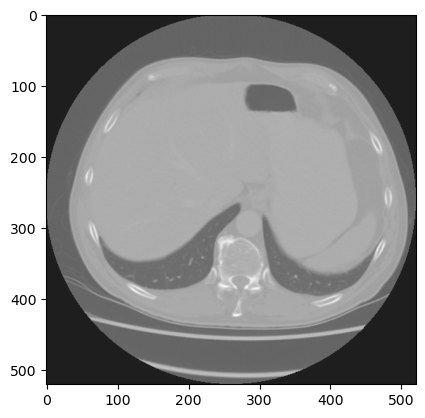

In [212]:
import SimpleITK as sitk

# 读取图像
image = sitk.ReadImage('../../Data/CT_Phase/Full_Image_Liver_07075/CILM_CT_101040_0000.nii.gz')

# 如果需要沿着x轴翻转图像
flipped_image = sitk.Flip(image, [False, True, False])
flipped_image_array = sitk.GetArrayFromImage(flipped_image)

plt.imshow(flipped_image_array[100,:,:],cmap='gray')

# 保存翻转后的图像
sitk.WriteImage(flipped_image, './Test.nii.gz')


-99

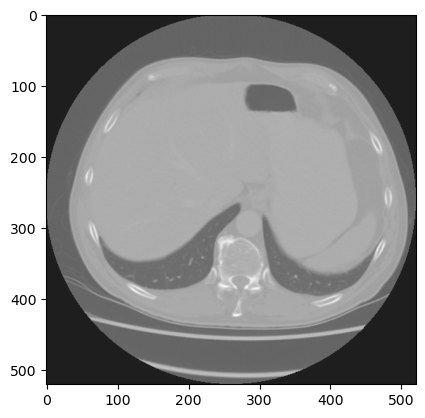

In [219]:
a = SimpleITK.ReadImage('./Test.nii.gz')
a.GetDirection()
plt.imshow(SimpleITK.GetArrayFromImage(a)[100,:,:],cmap='gray')


a_array = SimpleITK.GetArrayFromImage(a)
a_array[97,436,200]

In [222]:
import nibabel as nib
image_nib_array = nib.load('../../Data/CT_Phase/Full_Image_Liver_07075/CILM_CT_101040_0000.nii.gz').get_fdata()


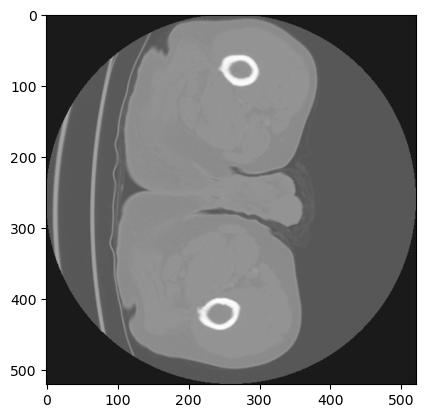

In [229]:
plt.imshow(image_nib_array[:,:,10],cmap='gray')

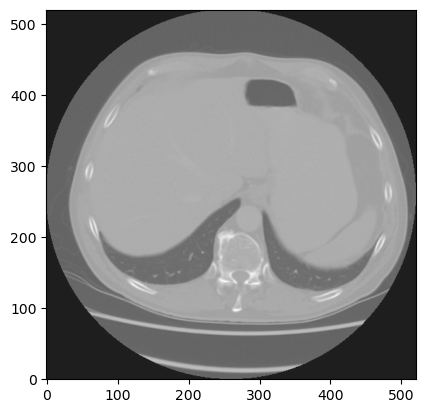

In [231]:
fig, ax = plt.subplots()
ax.imshow(image_array[100,:,:], cmap='gray')
#ax.imshow(image_nib_array[:,:,10], cmap='gray')


# 设置坐标轴的位置，这里'lower'表示将0点设置在左下角
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.savefig('./test.png',dpi=300)
#plt.show()

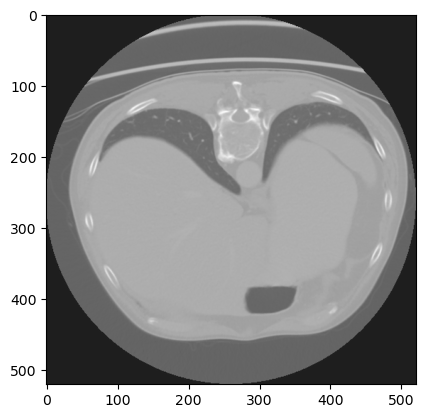

In [199]:
affineTrans =SimpleITK.AffineTransform(3)
affineTrans.SetMatrix([1,0,0,0,1,0,0,0,-1])
affineTrans.SetCenter([1,1,1])


plt.imshow(image_array[100,:,:],cmap='gray')

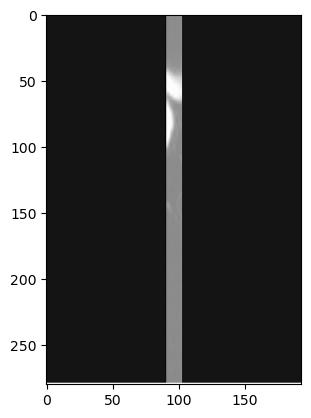

In [150]:
direction = image.GetDirection()
new_direction = (-direction[0], -direction[1], direction[2],
                 -direction[3], -direction[4], direction[5],
                 direction[6], direction[7], direction[8])
image.SetDirection(new_direction)
image_array = SimpleITK.GetArrayFromImage(image)
plt.imshow(image_array[:,:,:],cmap='gray')


In [136]:
direction

(-1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [62]:
train_data.to_csv('../../train_data_4.csv')
vali_data.to_csv('../../vali_data_4.csv')
test_data.to_csv('../../test_data_4.csv')

In [11]:

import monai
import torch

model = monai.networks.nets.resnet10()
model.parameters()

<generator object Module.parameters at 0x00000186E6371F20>

In [33]:
def build_optimizer(parameters,**kwargs):
    print(kwargs)
    return torch.optim.Adam(parameters,**kwargs)


optimizer_param = {"lr":0.001}
optimizer = build_optimizer(model.parameters(),**optimizer_param)

{'lr': 0.001}


In [46]:
from torch.nn import CrossEntropyLoss

class Loss:
    def __init__(self,*args,**kwargs):
        """
        args:
            args only have one loss function
        """
        self.args = args

    def build_loss(self):
        return self.args[0]
    
    def calculate_loss(self,*args):
        pass


CrossEntropyLoss()

In [20]:
from monai.transforms import Compose,EnsureChannelFirst,RandZoom,RandRotate,RandFlip,ToTensor
import inspect
transform_param = {"transform_methods":[
                                EnsureChannelFirst(),
                                # Data augmentation
                                RandZoom(prob = 0.5, min_zoom=1.0, max_zoom=1.2),
                                RandRotate(range_z = 0.35, prob = 0.8),
                                RandFlip(prob = 0.5),
                                # To tensor
                                ToTensor()
                                ]}
transform_param['transform_methods'][1].__dict__


{'_do_transform': True,
 'prob': 0.5,
 '_lazy': False,
 'min_zoom': (1.0,),
 'max_zoom': (1.2,),
 'mode': area,
 'padding_mode': edge,
 'align_corners': None,
 'dtype': torch.float32,
 'keep_size': True,
 'kwargs': {},
 '_zoom': [1.0]}

Test Dataloader


In [8]:
from sklearn.metrics import accuracy_score
import torch
a = torch.tensor([0,1])
b = [0,]
accuracy_score(a,b)

0.5

In [14]:
a = Data_Loader(dataset=dataset,batch_size=1,num_workers=0).build_train_loader()
len(a)

40

# Binary classifaction


In [2]:
import pandas as pd
pvp_label = pd.read_csv('../../Data/CT_Phase/True_Label/Phase_PVP.csv')
#将Phase中的Phase的1和0都换成0,2换成1
pvp_label['Phase'] = pvp_label['Phase'].apply(lambda x: 0 if x == 1 or x==0 else 1)


In [6]:
pvp_label.to_csv('../../Data/CT_Phase/True_Label/Phase_PVP.csv',index=False)




METRICS



In [29]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
from monai.metrics import get_confusion_matrix,compute_roc_auc
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score
from torch import tensor
from sklearn.metrics import precision_score, recall_score
import torch
import pandas as pd
import numpy as np
class Metrics():
    def __init__(self,num_class=2,y_pred=None,y_true_label=None,targets=None):
        """
        args:
            y_pred: list of predicted tensor
            y_true_label: list of true labels
            targets: dicts of targets and their labels
        """
        self.num_class = num_class
        self.four_rate_dic = {str(i):{'tp':0,'fp':0,'tn':0,'fn':0} for i in range(num_class)}
        self.y_true_label = np.array(y_true_label)
        self.y_pred_label = [torch.argmax(y_pre,dim=1).detach().cpu().numpy().tolist() for y_pre in y_pred]
        self.y_pred_label = [item for sublist in self.y_pred_label for item in sublist]

        self.y_pred_label = np.array(self.y_pred_label)
        self.y_pred_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_pred_label,dtype=torch.int64),num_classes=self.num_class)
        self.y_true_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_true_label.tolist(),dtype=torch.int64),num_classes=self.num_class)
    
    def calculate_metrics(self):
        self.metrics = {str(i): {'f1': 0, 'auc': 0, 'accuracy': 0, 'precision': 0, 'recall': 0} for i in range(self.num_class)}

        for i in range(self.num_class):
            true_binary = (self.y_true_label == i).astype(int)
            pred_binary = (self.y_pred_label == i).astype(int)
            print(true_binary,pred_binary,666)
            self.metrics[str(i)]['f1'] = f1_score(true_binary, pred_binary)
            self.metrics[str(i)]['precision'] = precision_score(true_binary, pred_binary)
            self.metrics[str(i)]['recall'] = recall_score(true_binary, pred_binary)

            if len(np.unique(true_binary)) > 1:
                self.metrics[str(i)]['auc'] = roc_auc_score(true_binary, self.y_pred_one_hot[:, i])

            self.metrics[str(i)]['accuracy'] = accuracy_score(true_binary, pred_binary)

        return self.metrics



    def get_roc(self,average='macro'):
        return compute_roc_auc(self.y_pred_one_hot,self.y_true_one_hot,average)
        

    def get_four_rate(self) -> tensor:
        """
        args:
            y_pred: (B,C) one-hot tensor
            y_true: (B,C) one-hot tensor
        """
        confu_matrix = get_confusion_matrix(self.y_pred_one_hot,self.y_true_one_hot)
        #calculate tp,fp,tn,fn
        for i in range(self.num_class):
            self.four_rate_dic[str(i)]['tp'] += confu_matrix[:,i,0].sum()
            self.four_rate_dic[str(i)]['fp'] += confu_matrix[:,i,1].sum() 
            self.four_rate_dic[str(i)]['tn'] += confu_matrix[:,i,2].sum() 
            self.four_rate_dic[str(i)]['fn'] += confu_matrix[:,i,3].sum()
        return self.four_rate_dic
    
    def get_accuracy(self) -> float:
        """
        args:
            y_pred_label: list of predicted labels
            y_true_label: list of true labels
        """
        accuracy = accuracy_score(self.y_pred_label,self.y_true_label)
        return accuracy
    
    def get_f1_score(self,average='macro') -> float:
        return f1_score(self.y_pred_label,self.y_true_label,average=average)
    

    def generate_metrics_df(self,epoch):

        # 将指标数据整理成列表形式
        metrics_data = []
        for class_id, class_metrics in self.metrics.items():
            data_row = {"epoch": epoch}  # 首先添加 epoch
            data_row.update({"class_id": class_id})  # 然后添加 class_id
            data_row.update(class_metrics)  # 最后添加其他指标
            metrics_data.append(data_row)



        # 创建DataFrame
        df = pd.DataFrame(metrics_data)

        return df


In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 定义网络结构
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 参数设置
input_size = 784  # 例如，28x28的图像展平后的大小
hidden_size = 100  # 隐藏层的大小
num_classes = 10   # 类别数，例如MNIST手写数字识别为10

# 创建网络
model = SimpleNet(input_size, hidden_size, num_classes)

# 假设我们有一些随机数据作为输入
batch_size = 2 # 批量大小
x = torch.randn(batch_size, input_size)  # 生成随机数据

# 前向传播
output = model(x)


# 输出结果
print(output.shape)  # 应该是 [batch_size, num_classes]

metrics = Metrics(10,y_pred=[output],y_true_label=[1 for i in range(2)])
metrics.calculate_metrics()

torch.Size([2, 10])
[0 0] [0 0] 666
[1 1] [0 0] 666
[0 0] [0 0] 666
[0 0] [0 0] 666
[0 0] [0 0] 666
[0 0] [0 0] 666
[0 0] [0 0] 666
[0 0] [0 0] 666
[0 0] [1 1] 666
[0 0] [0 0] 666


c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\098986\AppData\Loc

{'0': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0},
 '1': {'f1': 0.0, 'auc': 0, 'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0},
 '2': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0},
 '3': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0},
 '4': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0},
 '5': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0},
 '6': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0},
 '7': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0},
 '8': {'f1': 0.0, 'auc': 0, 'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0},
 '9': {'f1': 0.0, 'auc': 0, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0}}

# Timm Resnet18

In [9]:
import torch
import timm
from torch import nn

# 确保你的类别数
num_classes = 10

# 加载预训练的resnet18模型
model = timm.create_model('resnet18', pretrained=True)

# 修改最后的全连接层以适应你的类别数
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 一个简单的前向传递示例
def forward(x):
    return model(x)

# 测试模型
x = torch.randn(1, 3, 100, 100)  # 一个假设的输入张量
output = forward(x)
print(output.shape)  # 应该是 [1, num_classes]


torch.Size([1, 10])


In [13]:
output

tensor([[-0.0618, -0.0941,  0.1946, -0.2964,  0.0383,  0.0465, -0.2030, -0.2793,
          0.1523, -0.2352]], grad_fn=<AddmmBackward0>)

In [2]:
import torch
import sys
import os


c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sys.path.append('../')
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
from Core.Utils import  Swin_Transformer_Classification

model = Swin_Transformer_Classification.SwinUNETR(img_size=256,in_channels=1, num_classes=2, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],out_channels=1)

#model_dict = torch.load('../../Output/SwingTransformer/Test_local/fold0/best_metric_1.pth')

#model.load_state_dict(model_dict['model'])




welcome to Utils


In [5]:
model.eval()
with torch.no_grad():

    output = model(torch.randn(1,1,256,256,32))

torch.Size([1, 1, 256, 256, 32]) this is x shape
torch.Size([1, 24, 128, 128, 16]) after embed
torch.Size([1, 24, 128, 128, 16]) this is x0 shape
fucking dhw 133 133 21
torch.Size([1, 48, 64, 64, 8]) this is x1 shape
fucking dhw 70 70 14
torch.Size([1, 96, 32, 32, 4]) this is x2 shape
fucking dhw 35 35 4
fucking dhw 21 21 2
hidden states out torch.Size([1, 384, 8, 8, 1])


In [17]:
# Copyright (c) MONAI Consortium
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from __future__ import annotations

import itertools
from collections.abc import Sequence
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from torch.nn import LayerNorm
from typing_extensions import Final

from monai.networks.blocks import MLPBlock as Mlp
from monai.networks.blocks import PatchEmbed, UnetOutBlock, UnetrBasicBlock, UnetrUpBlock
from monai.networks.layers import DropPath, trunc_normal_
from monai.utils import ensure_tuple_rep, look_up_option, optional_import
from monai.utils.deprecate_utils import deprecated_arg

rearrange, _ = optional_import("einops", name="rearrange")

__all__ = [
    "SwinUNETR",
    "window_partition",
    "window_reverse",
    "WindowAttention",
    "SwinTransformerBlock",
    "PatchMerging",
    "PatchMergingV2",
    "MERGING_MODE",
    "BasicLayer",
    "SwinTransformer",
]



class Swintransformer(nn.Module):
    """
    Swin UNETR based on: "Hatamizadeh et al.,
    Swin UNETR: Swin Transformers for Semantic Segmentation of Brain Tumors in MRI Images
    <https://arxiv.org/abs/2201.01266>"
    """

    patch_size: Final[int] = 2

    @deprecated_arg(
        name="img_size",
        since="1.3",
        removed="1.5",
        msg_suffix="The img_size argument is not required anymore and "
        "checks on the input size are run during forward().",
    )
    def __init__(
        self,
        img_size: Sequence[int] | int,
        in_channels: int,
        out_channels: int,
        depths: Sequence[int] = (3, 3, 9, 3),
        num_heads: Sequence[int] = (3, 6, 12, 24),
        feature_size: int = 24,
        norm_name: tuple | str = "instance",
        drop_rate: float = 0.0,
        attn_drop_rate: float = 0.0,
        dropout_path_rate: float = 0.0,
        normalize: bool = True,
        use_checkpoint: bool = False,
        spatial_dims: int = 3,
        downsample="merging",
        use_v2=False,
        num_classes = 2
    ) -> None:
        """
        Args:
            img_size: spatial dimension of input image.
                This argument is only used for checking that the input image size is divisible by the patch size.
                The tensor passed to forward() can have a dynamic shape as long as its spatial dimensions are divisible by 2**5.
                It will be removed in an upcoming version.
            in_channels: dimension of input channels.
            out_channels: dimension of output channels.
            feature_size: dimension of network feature size.
            depths: number of layers in each stage.
            num_heads: number of attention heads.
            norm_name: feature normalization type and arguments.
            drop_rate: dropout rate.
            attn_drop_rate: attention dropout rate.
            dropout_path_rate: drop path rate.
            normalize: normalize output intermediate features in each stage.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
            spatial_dims: number of spatial dims.
            downsample: module used for downsampling, available options are `"mergingv2"`, `"merging"` and a
                user-specified `nn.Module` following the API defined in :py:class:`monai.networks.nets.PatchMerging`.
                The default is currently `"merging"` (the original version defined in v0.9.0).
            use_v2: using swinunetr_v2, which adds a residual convolution block at the beggining of each swin stage.
            num_class: number of classes for classification.
            
            # for 3D single channel input with size (96,96,96), 4-channel output and feature size of 48.
            >>> net = SwinUNETR(img_size=(96,96,96), in_channels=1, out_channels=4, feature_size=48)

            # for 3D 4-channel input with size (128,128,128), 3-channel output and (2,4,2,2) layers in each stage.
            >>> net = SwinUNETR(img_size=(128,128,128), in_channels=4, out_channels=3, depths=(2,4,2,2))

            # for 2D single channel input with size (96,96), 2-channel output and gradient checkpointing.
            >>> net = SwinUNETR(img_size=(96,96), in_channels=3, out_channels=2, use_checkpoint=True, spatial_dims=2)

        """

        super().__init__()

        img_size = ensure_tuple_rep(img_size, spatial_dims)
        patch_sizes = ensure_tuple_rep(self.patch_size, spatial_dims)
        window_size = ensure_tuple_rep(7, spatial_dims)
        #print(patch_sizes,'666')


        if spatial_dims not in (2, 3):
            raise ValueError("spatial dimension should be 2 or 3.")

        self._check_input_size(img_size)

        if not (0 <= drop_rate <= 1):
            raise ValueError("dropout rate should be between 0 and 1.")

        if not (0 <= attn_drop_rate <= 1):
            raise ValueError("attention dropout rate should be between 0 and 1.")

        if not (0 <= dropout_path_rate <= 1):
            raise ValueError("drop path rate should be between 0 and 1.")

        if feature_size % 12 != 0:
            raise ValueError("feature_size should be divisible by 12.")

        self.normalize = normalize
        self.num_class = num_classes
        self.final_feature_size = feature_size * 2 * 2 ** (len(depths) - 1)

        self.swinViT = SwinTransformer(
            in_chans=in_channels,
            embed_dim=feature_size,
            window_size=window_size,
            patch_size=patch_sizes,
            depths=depths,
            num_heads=num_heads,
            mlp_ratio=4.0,
            qkv_bias=True,
            drop_rate=drop_rate,
            attn_drop_rate=attn_drop_rate,
            drop_path_rate=dropout_path_rate,
            norm_layer=nn.LayerNorm,
            use_checkpoint=use_checkpoint,
            spatial_dims=spatial_dims,
            downsample=look_up_option(downsample, MERGING_MODE) if isinstance(downsample, str) else downsample,
            use_v2=use_v2,
        )

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.head = nn.Linear(self.final_feature_size, self.num_class)
        
    def load_from(self, weights):
        with torch.no_grad():
            self.swinViT.patch_embed.proj.weight.copy_(weights["state_dict"]["module.patch_embed.proj.weight"])
            self.swinViT.patch_embed.proj.bias.copy_(weights["state_dict"]["module.patch_embed.proj.bias"])
            for bname, block in self.swinViT.layers1[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers1")
            self.swinViT.layers1[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers1.0.downsample.reduction.weight"]
            )
            self.swinViT.layers1[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers1.0.downsample.norm.weight"]
            )
            self.swinViT.layers1[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers1.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers2[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers2")
            self.swinViT.layers2[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers2.0.downsample.reduction.weight"]
            )
            self.swinViT.layers2[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers2.0.downsample.norm.weight"]
            )
            self.swinViT.layers2[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers2.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers3[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers3")
            self.swinViT.layers3[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers3.0.downsample.reduction.weight"]
            )
            self.swinViT.layers3[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers3.0.downsample.norm.weight"]
            )
            self.swinViT.layers3[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers3.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers4[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers4")
            self.swinViT.layers4[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers4.0.downsample.reduction.weight"]
            )
            self.swinViT.layers4[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers4.0.downsample.norm.weight"]
            )
            self.swinViT.layers4[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers4.0.downsample.norm.bias"]
            )

    @torch.jit.unused
    def _check_input_size(self, spatial_shape):
        img_size = np.array(spatial_shape)
        remainder = (img_size % np.power(self.patch_size, 5)) > 0
        if remainder.any():
            wrong_dims = (np.where(remainder)[0] + 2).tolist()
            raise ValueError(
                f"spatial dimensions {wrong_dims} of input image (spatial shape: {spatial_shape})"
                f" must be divisible by {self.patch_size}**5."
            )

    def forward(self, x_in):
        if not torch.jit.is_scripting():
            self._check_input_size(x_in.shape[2:])
        hidden_states_out = self.swinViT(x_in, self.normalize)
        #print('hidden states out',hidden_states_out.shape)
        
        x = self.avgpool(hidden_states_out)
        x = torch.flatten(x, 1)
        x = self.head(x)
        return x

def window_partition(x, window_size):
    """window partition operation based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        x: input tensor.
        window_size: local window size.
    """
    x_shape = x.size()
    if len(x_shape) == 5:
        b, d, h, w, c = x_shape
        x = x.view(
            b,
            d // window_size[0],
            window_size[0],
            h // window_size[1],
            window_size[1],
            w // window_size[2],
            window_size[2],
            c,
        )
        windows = (
            x.permute(0, 1, 3, 5, 2, 4, 6, 7).contiguous().view(-1, window_size[0] * window_size[1] * window_size[2], c)
        )
    elif len(x_shape) == 4:
        b, h, w, c = x.shape
        x = x.view(b, h // window_size[0], window_size[0], w // window_size[1], window_size[1], c)
        windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size[0] * window_size[1], c)
    return windows


def window_reverse(windows, window_size, dims):
    """window reverse operation based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        windows: windows tensor.
        window_size: local window size.
        dims: dimension values.
    """
    if len(dims) == 4:
        b, d, h, w = dims
        x = windows.view(
            b,
            d // window_size[0],
            h // window_size[1],
            w // window_size[2],
            window_size[0],
            window_size[1],
            window_size[2],
            -1,
        )
        x = x.permute(0, 1, 4, 2, 5, 3, 6, 7).contiguous().view(b, d, h, w, -1)

    elif len(dims) == 3:
        b, h, w = dims
        x = windows.view(b, h // window_size[0], w // window_size[1], window_size[0], window_size[1], -1)
        x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(b, h, w, -1)
    return x


def get_window_size(x_size, window_size, shift_size=None):
    """Computing window size based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        x_size: input size.
        window_size: local window size.
        shift_size: window shifting size.
    """

    use_window_size = list(window_size)
    if shift_size is not None:
        use_shift_size = list(shift_size)
    for i in range(len(x_size)):
        if x_size[i] <= window_size[i]:
            use_window_size[i] = x_size[i]
            if shift_size is not None:
                use_shift_size[i] = 0

    if shift_size is None:
        return tuple(use_window_size)
    else:
        return tuple(use_window_size), tuple(use_shift_size)


class WindowAttention(nn.Module):
    """
    Window based multi-head self attention module with relative position bias based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        num_heads: int,
        window_size: Sequence[int],
        qkv_bias: bool = False,
        attn_drop: float = 0.0,
        proj_drop: float = 0.0,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            num_heads: number of attention heads.
            window_size: local window size.
            qkv_bias: add a learnable bias to query, key, value.
            attn_drop: attention dropout rate.
            proj_drop: dropout rate of output.
        """

        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim**-0.5
        mesh_args = torch.meshgrid.__kwdefaults__

        if len(self.window_size) == 3:
            self.relative_position_bias_table = nn.Parameter(
                torch.zeros(
                    (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1) * (2 * self.window_size[2] - 1),
                    num_heads,
                )
            )
            coords_d = torch.arange(self.window_size[0])
            coords_h = torch.arange(self.window_size[1])
            coords_w = torch.arange(self.window_size[2])
            if mesh_args is not None:
                coords = torch.stack(torch.meshgrid(coords_d, coords_h, coords_w, indexing="ij"))
            else:
                coords = torch.stack(torch.meshgrid(coords_d, coords_h, coords_w))
            coords_flatten = torch.flatten(coords, 1)
            relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
            relative_coords = relative_coords.permute(1, 2, 0).contiguous()
            relative_coords[:, :, 0] += self.window_size[0] - 1
            relative_coords[:, :, 1] += self.window_size[1] - 1
            relative_coords[:, :, 2] += self.window_size[2] - 1
            relative_coords[:, :, 0] *= (2 * self.window_size[1] - 1) * (2 * self.window_size[2] - 1)
            relative_coords[:, :, 1] *= 2 * self.window_size[2] - 1
        elif len(self.window_size) == 2:
            self.relative_position_bias_table = nn.Parameter(
                torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads)
            )
            coords_h = torch.arange(self.window_size[0])
            coords_w = torch.arange(self.window_size[1])
            if mesh_args is not None:
                coords = torch.stack(torch.meshgrid(coords_h, coords_w, indexing="ij"))
            else:
                coords = torch.stack(torch.meshgrid(coords_h, coords_w))
            coords_flatten = torch.flatten(coords, 1)
            relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
            relative_coords = relative_coords.permute(1, 2, 0).contiguous()
            relative_coords[:, :, 0] += self.window_size[0] - 1
            relative_coords[:, :, 1] += self.window_size[1] - 1
            relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1

        relative_position_index = relative_coords.sum(-1)
        self.register_buffer("relative_position_index", relative_position_index)
        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)
        trunc_normal_(self.relative_position_bias_table, std=0.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask):
        b, n, c = x.shape
        qkv = self.qkv(x).reshape(b, n, 3, self.num_heads, c // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        q = q * self.scale
        attn = q @ k.transpose(-2, -1)
        relative_position_bias = self.relative_position_bias_table[
            self.relative_position_index.clone()[:n, :n].reshape(-1)
        ].reshape(n, n, -1)
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()
        attn = attn + relative_position_bias.unsqueeze(0)
        if mask is not None:
            nw = mask.shape[0]
            attn = attn.view(b // nw, nw, self.num_heads, n, n) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, n, n)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn).to(v.dtype)
        x = (attn @ v).transpose(1, 2).reshape(b, n, c)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class SwinTransformerBlock(nn.Module):
    """
    Swin Transformer block based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        num_heads: int,
        window_size: Sequence[int],
        shift_size: Sequence[int],
        mlp_ratio: float = 4.0,
        qkv_bias: bool = True,
        drop: float = 0.0,
        attn_drop: float = 0.0,
        drop_path: float = 0.0,
        act_layer: str = "GELU",
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        use_checkpoint: bool = False,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            num_heads: number of attention heads.
            window_size: local window size.
            shift_size: window shift size.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop: dropout rate.
            attn_drop: attention dropout rate.
            drop_path: stochastic depth rate.
            act_layer: activation layer.
            norm_layer: normalization layer.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
        """

        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        self.use_checkpoint = use_checkpoint
        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim,
            window_size=self.window_size,
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            attn_drop=attn_drop,
            proj_drop=drop,
        )

        self.drop_path = DropPath(drop_path) if drop_path > 0.0 else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(hidden_size=dim, mlp_dim=mlp_hidden_dim, act=act_layer, dropout_rate=drop, dropout_mode="swin")

    def forward_part1(self, x, mask_matrix):
        x_shape = x.size()
        x = self.norm1(x)
        if len(x_shape) == 5:
            b, d, h, w, c = x.shape
            window_size, shift_size = get_window_size((d, h, w), self.window_size, self.shift_size)
            pad_l = pad_t = pad_d0 = 0
            pad_d1 = (window_size[0] - d % window_size[0]) % window_size[0]
            pad_b = (window_size[1] - h % window_size[1]) % window_size[1]
            pad_r = (window_size[2] - w % window_size[2]) % window_size[2]
            x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b, pad_d0, pad_d1))
            _, dp, hp, wp, _ = x.shape
            dims = [b, dp, hp, wp]

        elif len(x_shape) == 4:
            b, h, w, c = x.shape
            window_size, shift_size = get_window_size((h, w), self.window_size, self.shift_size)
            pad_l = pad_t = 0
            pad_b = (window_size[0] - h % window_size[0]) % window_size[0]
            pad_r = (window_size[1] - w % window_size[1]) % window_size[1]
            x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b))
            _, hp, wp, _ = x.shape
            dims = [b, hp, wp]

        if any(i > 0 for i in shift_size):
            if len(x_shape) == 5:
                shifted_x = torch.roll(x, shifts=(-shift_size[0], -shift_size[1], -shift_size[2]), dims=(1, 2, 3))
            elif len(x_shape) == 4:
                shifted_x = torch.roll(x, shifts=(-shift_size[0], -shift_size[1]), dims=(1, 2))
            attn_mask = mask_matrix
        else:
            shifted_x = x
            attn_mask = None
        x_windows = window_partition(shifted_x, window_size)
        attn_windows = self.attn(x_windows, mask=attn_mask)
        attn_windows = attn_windows.view(-1, *(window_size + (c,)))
        shifted_x = window_reverse(attn_windows, window_size, dims)
        if any(i > 0 for i in shift_size):
            if len(x_shape) == 5:
                x = torch.roll(shifted_x, shifts=(shift_size[0], shift_size[1], shift_size[2]), dims=(1, 2, 3))
            elif len(x_shape) == 4:
                x = torch.roll(shifted_x, shifts=(shift_size[0], shift_size[1]), dims=(1, 2))
        else:
            x = shifted_x

        if len(x_shape) == 5:
            if pad_d1 > 0 or pad_r > 0 or pad_b > 0:
                x = x[:, :d, :h, :w, :].contiguous()
        elif len(x_shape) == 4:
            if pad_r > 0 or pad_b > 0:
                x = x[:, :h, :w, :].contiguous()

        return x

    def forward_part2(self, x):
        
        return self.drop_path(self.mlp(self.norm2(x)))

    def load_from(self, weights, n_block, layer):
        root = f"module.{layer}.0.blocks.{n_block}."
        block_names = [
            "norm1.weight",
            "norm1.bias",
            "attn.relative_position_bias_table",
            "attn.relative_position_index",
            "attn.qkv.weight",
            "attn.qkv.bias",
            "attn.proj.weight",
            "attn.proj.bias",
            "norm2.weight",
            "norm2.bias",
            "mlp.fc1.weight",
            "mlp.fc1.bias",
            "mlp.fc2.weight",
            "mlp.fc2.bias",
        ]
        with torch.no_grad():
            self.norm1.weight.copy_(weights["state_dict"][root + block_names[0]])
            self.norm1.bias.copy_(weights["state_dict"][root + block_names[1]])
            self.attn.relative_position_bias_table.copy_(weights["state_dict"][root + block_names[2]])
            self.attn.relative_position_index.copy_(weights["state_dict"][root + block_names[3]])
            self.attn.qkv.weight.copy_(weights["state_dict"][root + block_names[4]])
            self.attn.qkv.bias.copy_(weights["state_dict"][root + block_names[5]])
            self.attn.proj.weight.copy_(weights["state_dict"][root + block_names[6]])
            self.attn.proj.bias.copy_(weights["state_dict"][root + block_names[7]])
            self.norm2.weight.copy_(weights["state_dict"][root + block_names[8]])
            self.norm2.bias.copy_(weights["state_dict"][root + block_names[9]])
            self.mlp.linear1.weight.copy_(weights["state_dict"][root + block_names[10]])
            self.mlp.linear1.bias.copy_(weights["state_dict"][root + block_names[11]])
            self.mlp.linear2.weight.copy_(weights["state_dict"][root + block_names[12]])
            self.mlp.linear2.bias.copy_(weights["state_dict"][root + block_names[13]])

    def forward(self, x, mask_matrix):
        shortcut = x
        if self.use_checkpoint:
            x = checkpoint.checkpoint(self.forward_part1, x, mask_matrix, use_reentrant=False)
        else:
            x = self.forward_part1(x, mask_matrix)
        x = shortcut + self.drop_path(x)
        if self.use_checkpoint:
            x = x + checkpoint.checkpoint(self.forward_part2, x, use_reentrant=False)
        else:
            x = x + self.forward_part2(x)
        return x


class PatchMergingV2(nn.Module):
    """
    Patch merging layer based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(self, dim: int, norm_layer: type[LayerNorm] = nn.LayerNorm, spatial_dims: int = 3) -> None:
        """
        Args:
            dim: number of feature channels.
            norm_layer: normalization layer.
            spatial_dims: number of spatial dims.
        """

        super().__init__()
        self.dim = dim
        if spatial_dims == 3:
            self.reduction = nn.Linear(8 * dim, 2 * dim, bias=False)
            self.norm = norm_layer(8 * dim)
        elif spatial_dims == 2:
            self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
            self.norm = norm_layer(4 * dim)

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 5:
            b, d, h, w, c = x_shape
            pad_input = (h % 2 == 1) or (w % 2 == 1) or (d % 2 == 1)
            if pad_input:
                x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2, 0, d % 2))
            x = torch.cat(
                [x[:, i::2, j::2, k::2, :] for i, j, k in itertools.product(range(2), range(2), range(2))], -1
            )

        elif len(x_shape) == 4:
            b, h, w, c = x_shape
            pad_input = (h % 2 == 1) or (w % 2 == 1)
            if pad_input:
                x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2))
            x = torch.cat([x[:, j::2, i::2, :] for i, j in itertools.product(range(2), range(2))], -1)

        x = self.norm(x)
        x = self.reduction(x)
        return x


class PatchMerging(PatchMergingV2):
    """The `PatchMerging` module previously defined in v0.9.0."""

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 4:
            return super().forward(x)
        if len(x_shape) != 5:
            raise ValueError(f"expecting 5D x, got {x.shape}.")
        b, d, h, w, c = x_shape
        pad_input = (h % 2 == 1) or (w % 2 == 1) or (d % 2 == 1)
        if pad_input:
            x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2, 0, d % 2))
        x0 = x[:, 0::2, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, 0::2, :]
        x3 = x[:, 0::2, 0::2, 1::2, :]
        x4 = x[:, 1::2, 0::2, 1::2, :]
        x5 = x[:, 0::2, 1::2, 0::2, :]
        x6 = x[:, 0::2, 0::2, 1::2, :]
        x7 = x[:, 1::2, 1::2, 1::2, :]
        x = torch.cat([x0, x1, x2, x3, x4, x5, x6, x7], -1)
        x = self.norm(x)
        print(x.shape,'before reduction')
        x = self.reduction(x)
        print('class patch merging',x.shape)
        return x


MERGING_MODE = {"merging": PatchMerging, "mergingv2": PatchMergingV2}


def compute_mask(dims, window_size, shift_size, device):
    """Computing region masks based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        dims: dimension values.
        window_size: local window size.
        shift_size: shift size.
        device: device.
    """

    cnt = 0

    if len(dims) == 3:
        d, h, w = dims
        #print('fucking dhw',d,h,w)
        img_mask = torch.zeros((1, d, h, w, 1), device=device)
        for d in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
            for h in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
                for w in slice(-window_size[2]), slice(-window_size[2], -shift_size[2]), slice(-shift_size[2], None):
                    img_mask[:, d, h, w, :] = cnt
                    cnt += 1

    elif len(dims) == 2:
        h, w = dims
        img_mask = torch.zeros((1, h, w, 1), device=device)
        for h in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
            for w in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
                img_mask[:, h, w, :] = cnt
                cnt += 1

    mask_windows = window_partition(img_mask, window_size)
    mask_windows = mask_windows.squeeze(-1)
    attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
    attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))

    return attn_mask


class BasicLayer(nn.Module):
    """
    Basic Swin Transformer layer in one stage based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        depth: int,
        num_heads: int,
        window_size: Sequence[int],
        drop_path: list,
        mlp_ratio: float = 4.0,
        qkv_bias: bool = False,
        drop: float = 0.0,
        attn_drop: float = 0.0,
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        downsample: nn.Module | None = None,
        use_checkpoint: bool = False,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            depth: number of layers in each stage.
            num_heads: number of attention heads.
            window_size: local window size.
            drop_path: stochastic depth rate.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop: dropout rate.
            attn_drop: attention dropout rate.
            norm_layer: normalization layer.
            downsample: an optional downsampling layer at the end of the layer.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
        """

        super().__init__()
        self.window_size = window_size
        #就是除以windowsize,比如56X56 shiftsize就是3X3,因为windowssize 是7X7
        self.shift_size = tuple(i // 2 for i in window_size)
        self.no_shift = tuple(0 for i in window_size)
        self.depth = depth
        self.use_checkpoint = use_checkpoint
        self.blocks = nn.ModuleList(
            [
                SwinTransformerBlock(
                    dim=dim,
                    num_heads=num_heads,
                    window_size=self.window_size,
                    shift_size=self.no_shift if (i % 2 == 0) else self.shift_size,
                    mlp_ratio=mlp_ratio,
                    qkv_bias=qkv_bias,
                    drop=drop,
                    attn_drop=attn_drop,
                    drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                    norm_layer=norm_layer,
                    use_checkpoint=use_checkpoint,
                )
                for i in range(depth)
            ]
        )
        #就是patch merging
        self.downsample = downsample
        if callable(self.downsample):
            self.downsample = downsample(dim=dim, norm_layer=norm_layer, spatial_dims=len(self.window_size))

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 5:
            b, c, d, h, w = x_shape
            window_size, shift_size = get_window_size((d, h, w), self.window_size, self.shift_size)
            x = rearrange(x, "b c d h w -> b d h w c")
            dp = int(np.ceil(d / window_size[0])) * window_size[0]
            hp = int(np.ceil(h / window_size[1])) * window_size[1]
            wp = int(np.ceil(w / window_size[2])) * window_size[2]
            attn_mask = compute_mask([dp, hp, wp], window_size, shift_size, x.device)
            for blk in self.blocks:
                x = blk(x, attn_mask)
            x = x.view(b, d, h, w, -1)
            print(x.shape,'before blk')
            if self.downsample is not None:
                x = self.downsample(x)
                print('after downsample',x.shape,'blk')
            x = rearrange(x, "b d h w c -> b c d h w")

        elif len(x_shape) == 4:
            b, c, h, w = x_shape
            window_size, shift_size = get_window_size((h, w), self.window_size, self.shift_size)
            x = rearrange(x, "b c h w -> b h w c")
            hp = int(np.ceil(h / window_size[0])) * window_size[0]
            wp = int(np.ceil(w / window_size[1])) * window_size[1]
            attn_mask = compute_mask([hp, wp], window_size, shift_size, x.device)
            for blk in self.blocks:
                x = blk(x, attn_mask)
            print('after block',x.shape)
            x = x.view(b, h, w, -1)
            if self.downsample is not None:
                x = self.downsample(x)
            x = rearrange(x, "b h w c -> b c h w")
        return x


class SwinTransformer(nn.Module):
    """
    Swin Transformer based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        in_chans: int,
        embed_dim: int,
        window_size: Sequence[int],
        patch_size: Sequence[int],
        depths: Sequence[int],
        num_heads: Sequence[int],
        mlp_ratio: float = 4.0,
        qkv_bias: bool = True,
        drop_rate: float = 0.0,
        attn_drop_rate: float = 0.0,
        drop_path_rate: float = 0.0,
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        patch_norm: bool = False,
        use_checkpoint: bool = False,
        spatial_dims: int = 3,
        downsample="merging",
        use_v2=False,
    ) -> None:
        """
        Args:
            in_chans: dimension of input channels.
            embed_dim: number of linear projection output channels.
            window_size: local window size.
            patch_size: patch size.
            depths: number of layers in each stage.
            num_heads: number of attention heads.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop_rate: dropout rate.
            attn_drop_rate: attention dropout rate.
            drop_path_rate: stochastic depth rate.
            norm_layer: normalization layer.
            patch_norm: add normalization after patch embedding.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
            spatial_dims: spatial dimension.
            downsample: module used for downsampling, available options are `"mergingv2"`, `"merging"` and a
                user-specified `nn.Module` following the API defined in :py:class:`monai.networks.nets.PatchMerging`.
                The default is currently `"merging"` (the original version defined in v0.9.0).
            use_v2: using swinunetr_v2, which adds a residual convolution block at the beginning of each swin stage.
        """

        super().__init__()
        #print(depths,'depth')
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.patch_norm = patch_norm
        self.window_size = window_size
        self.patch_size = patch_size
        self.patch_embed = PatchEmbed(
            patch_size=self.patch_size,
            in_chans=in_chans,
            embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None,  # type: ignore
            spatial_dims=spatial_dims,
        )
        self.pos_drop = nn.Dropout(p=drop_rate)
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        self.use_v2 = use_v2
        self.layers1 = nn.ModuleList()
        self.layers2 = nn.ModuleList()
        self.layers3 = nn.ModuleList()
        self.layers4 = nn.ModuleList()
        if self.use_v2:
            self.layers1c = nn.ModuleList()
            self.layers2c = nn.ModuleList()
            self.layers3c = nn.ModuleList()
            self.layers4c = nn.ModuleList()
        down_sample_mod = look_up_option(downsample, MERGING_MODE) if isinstance(downsample, str) else downsample
        for i_layer in range(self.num_layers):
            layer = BasicLayer(
                dim=int(embed_dim * 2**i_layer),
                depth=depths[i_layer],
                num_heads=num_heads[i_layer],
                window_size=self.window_size,
                drop_path=dpr[sum(depths[:i_layer]) : sum(depths[: i_layer + 1])],
                mlp_ratio=mlp_ratio,
                qkv_bias=qkv_bias,
                drop=drop_rate,
                attn_drop=attn_drop_rate,
                norm_layer=norm_layer,
                downsample=down_sample_mod,
                use_checkpoint=use_checkpoint,
            )
            if i_layer == 0:
                self.layers1.append(layer)
            elif i_layer == 1:
                self.layers2.append(layer)
            elif i_layer == 2:
                self.layers3.append(layer)
            elif i_layer == 3:
                self.layers4.append(layer)
            if self.use_v2:
                layerc = UnetrBasicBlock(
                    spatial_dims=3,
                    in_channels=embed_dim * 2**i_layer,
                    out_channels=embed_dim * 2**i_layer,
                    kernel_size=3,
                    stride=1,
                    norm_name="instance",
                    res_block=True,
                )
                if i_layer == 0:
                    self.layers1c.append(layerc)
                elif i_layer == 1:
                    self.layers2c.append(layerc)
                elif i_layer == 2:
                    self.layers3c.append(layerc)
                elif i_layer == 3:
                    self.layers4c.append(layerc)
        #这里的number features跟层数有关系！比如说4层的话，最后的number features就是embed_dim * 2 ** 3
        self.num_features = int(embed_dim * 2 ** (self.num_layers - 1))

    def proj_out(self, x, normalize=False):
        if normalize:
            x_shape = x.size()
            if len(x_shape) == 5:

                n, ch, d, h, w = x_shape
                x = rearrange(x, "n c d h w -> n d h w c")
                x = F.layer_norm(x, [ch])
                x = rearrange(x, "n d h w c -> n c d h w")
            elif len(x_shape) == 4:
                n, ch, h, w = x_shape
                x = rearrange(x, "n c h w -> n h w c")
                x = F.layer_norm(x, [ch])
                x = rearrange(x, "n h w c -> n c h w")
        return x

    def forward(self, x, normalize=True):
        #print(x.shape,'this is x shape')
        x0 = self.patch_embed(x)
        print(x0.shape,'after embed')
        x0 = self.pos_drop(x0)
        print(x0.shape,'this is x0 shape')
        x0_out = self.proj_out(x0, normalize)
        #print(x0_out[:,:,0,0,:],x0[:,:,0,0,:])
        if self.use_v2:
            x0 = self.layers1c[0](x0.contiguous())
        x1 = self.layers1[0](x0.contiguous())
        print(x1.shape,'this is x1 shape')
        x1_out = self.proj_out(x1, normalize)
        if self.use_v2:
            x1 = self.layers2c[0](x1.contiguous())
        x2 = self.layers2[0](x1.contiguous())
        x2_out = self.proj_out(x2, normalize)
        print(x2.shape,'this is x2 shape')
        if self.use_v2:
            x2 = self.layers3c[0](x2.contiguous())
        x3 = self.layers3[0](x2.contiguous())
        x3_out = self.proj_out(x3, normalize)
        if self.use_v2:
            x3 = self.layers4c[0](x3.contiguous())
        x4 = self.layers4[0](x3.contiguous())
        x4_out = self.proj_out(x4, normalize)
        print(x4.shape,'this is x4 shape')
        #return [x0_out, x1_out, x2_out, x3_out, x4_out]
        return x4_out


def filter_swinunetr(key, value):
    """
    A filter function used to filter the pretrained weights from [1], then the weights can be loaded into MONAI SwinUNETR Model.
    This function is typically used with `monai.networks.copy_model_state`
    [1] "Valanarasu JM et al., Disruptive Autoencoders: Leveraging Low-level features for 3D Medical Image Pre-training
    <https://arxiv.org/abs/2307.16896>"

    Args:
        key: the key in the source state dict used for the update.
        value: the value in the source state dict used for the update.

    Examples::

        import torch
        from monai.apps import download_url
        from monai.networks.utils import copy_model_state
        from monai.networks.nets.swin_unetr import SwinUNETR, filter_swinunetr

        model = SwinUNETR(img_size=(96, 96, 96), in_channels=1, out_channels=3, feature_size=48)
        resource = (
            "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/ssl_pretrained_weights.pth"
        )
        ssl_weights_path = "./ssl_pretrained_weights.pth"
        download_url(resource, ssl_weights_path)
        ssl_weights = torch.load(ssl_weights_path)["model"]

        dst_dict, loaded, not_loaded = copy_model_state(model, ssl_weights, filter_func=filter_swinunetr)

    """
    if key in [
        "encoder.mask_token",
        "encoder.norm.weight",
        "encoder.norm.bias",
        "out.conv.conv.weight",
        "out.conv.conv.bias",
    ]:
        return None

    if key[:8] == "encoder.":
        if key[8:19] == "patch_embed":
            new_key = "swinViT." + key[8:]
        else:
            new_key = "swinViT." + key[8:18] + key[20:]

        return new_key, value
    else:
        return None



In [22]:
# Copyright (c) MONAI Consortium
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from __future__ import annotations

import itertools
from collections.abc import Sequence

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from torch.nn import LayerNorm
from typing_extensions import Final

from monai.networks.blocks import MLPBlock as Mlp
from monai.networks.blocks import PatchEmbed, UnetOutBlock, UnetrBasicBlock, UnetrUpBlock
from monai.networks.layers import DropPath, trunc_normal_
from monai.utils import ensure_tuple_rep, look_up_option, optional_import
from monai.utils.deprecate_utils import deprecated_arg

rearrange, _ = optional_import("einops", name="rearrange")

__all__ = [
    "SwinUNETR",
    "window_partition",
    "window_reverse",
    "WindowAttention",
    "SwinTransformerBlock",
    "PatchMerging",
    "PatchMergingV2",
    "MERGING_MODE",
    "BasicLayer",
    "SwinTransformer",
]



class SwinSparseTransformer(nn.Module):
    """
    Swin UNETR based on: "Hatamizadeh et al.,
    Swin UNETR: Swin Transformers for Semantic Segmentation of Brain Tumors in MRI Images
    <https://arxiv.org/abs/2201.01266>"
    """

    patch_size: Final[int] = 2

    @deprecated_arg(
        name="img_size",
        since="1.3",
        removed="1.5",
        msg_suffix="The img_size argument is not required anymore and "
        "checks on the input size are run during forward().",
    )
    def __init__(
        self,
        img_size: Sequence[int] | int,
        in_channels: int,
        out_channels: int,
        depths: Sequence[int] = (3, 3, 9, 3),
        num_heads: Sequence[int] = (3, 6, 12, 24),
        feature_size: int = 24,
        norm_name: tuple | str = "instance",
        drop_rate: float = 0.0,
        attn_drop_rate: float = 0.0,
        dropout_path_rate: float = 0.0,
        normalize: bool = True,
        use_checkpoint: bool = False,
        spatial_dims: int = 3,
        downsample="merging",
        use_v2=False,
        num_classes = 2,
        interval = [(4,16),(2,8),(2,4),(2,4)]
    ) -> None:
        """
        Args:
            img_size: spatial dimension of input image.
                This argument is only used for checking that the input image size is divisible by the patch size.
                The tensor passed to forward() can have a dynamic shape as long as its spatial dimensions are divisible by 2**5.
                It will be removed in an upcoming version.
            in_channels: dimension of input channels.
            out_channels: dimension of output channels.
            feature_size: dimension of network feature size.
            depths: number of layers in each stage.
            num_heads: number of attention heads.
            norm_name: feature normalization type and arguments.
            drop_rate: dropout rate.
            attn_drop_rate: attention dropout rate.
            dropout_path_rate: drop path rate.
            normalize: normalize output intermediate features in each stage.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
            spatial_dims: number of spatial dims.
            downsample: module used for downsampling, available options are `"mergingv2"`, `"merging"` and a
                user-specified `nn.Module` following the API defined in :py:class:`monai.networks.nets.PatchMerging`.
                The default is currently `"merging"` (the original version defined in v0.9.0).
            use_v2: using swinunetr_v2, which adds a residual convolution block at the beggining of each swin stage.
            num_class: number of classes for classification.
        Examples::

            # for 3D single channel input with size (96,96,96), 4-channel output and feature size of 48.
            >>> net = SwinUNETR(img_size=(96,96,96), in_channels=1, out_channels=4, feature_size=48)

            # for 3D 4-channel input with size (128,128,128), 3-channel output and (2,4,2,2) layers in each stage.
            >>> net = SwinUNETR(img_size=(128,128,128), in_channels=4, out_channels=3, depths=(2,4,2,2))

            # for 2D single channel input with size (96,96), 2-channel output and gradient checkpointing.
            >>> net = SwinUNETR(img_size=(96,96), in_channels=3, out_channels=2, use_checkpoint=True, spatial_dims=2)

        """

        super().__init__()

        img_size = ensure_tuple_rep(img_size, spatial_dims)
        patch_sizes = ensure_tuple_rep(self.patch_size, spatial_dims)
        window_size = ensure_tuple_rep(7, spatial_dims)
        #print(patch_sizes,'666')
        d,h,w = img_size[0],img_size[1],img_size[2]
        sparse_window_size = []
        #calculatye sparse size
        for i in range(len(depths)):
            G_d = d//(2**(i+1) * interval[i][0])

            G_h = h//(2**(i+1) * interval[i][1])
            G_w = w//(2**(i+1) * interval[i][1])
            #print(G_d,G_h,G_w,'this is sparse size')
            sparse_window_size.append((G_d,G_h,G_w))
        #
            
            #print('fuck sparse',sparse_window_size)
        if spatial_dims not in (2, 3):
            raise ValueError("spatial dimension should be 2 or 3.")

        self._check_input_size(img_size)

        if not (0 <= drop_rate <= 1):
            raise ValueError("dropout rate should be between 0 and 1.")

        if not (0 <= attn_drop_rate <= 1):
            raise ValueError("attention dropout rate should be between 0 and 1.")

        if not (0 <= dropout_path_rate <= 1):
            raise ValueError("drop path rate should be between 0 and 1.")

        if feature_size % 12 != 0:
            raise ValueError("feature_size should be divisible by 12.")

        self.normalize = normalize
        self.num_class = num_classes
        self.final_feature_size = feature_size * 2 * 2 ** (len(depths) - 1)

        self.swinViT = SwinTransformer(
            in_chans=in_channels,
            embed_dim=feature_size,
            window_size=window_size,
            patch_size=patch_sizes,
            depths=depths,
            num_heads=num_heads,
            mlp_ratio=4.0,
            qkv_bias=True,
            drop_rate=drop_rate,
            attn_drop_rate=attn_drop_rate,
            drop_path_rate=dropout_path_rate,
            norm_layer=nn.LayerNorm,
            use_checkpoint=use_checkpoint,
            spatial_dims=spatial_dims,
            downsample=look_up_option(downsample, MERGING_MODE) if isinstance(downsample, str) else downsample,
            use_v2=use_v2,
            interval = interval,
            sparse_window_size = sparse_window_size
        )

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.head = nn.Linear(self.final_feature_size, self.num_class)
        
    def load_from(self, weights):
        with torch.no_grad():
            self.swinViT.patch_embed.proj.weight.copy_(weights["state_dict"]["module.patch_embed.proj.weight"])
            self.swinViT.patch_embed.proj.bias.copy_(weights["state_dict"]["module.patch_embed.proj.bias"])
            for bname, block in self.swinViT.layers1[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers1")
            self.swinViT.layers1[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers1.0.downsample.reduction.weight"]
            )
            self.swinViT.layers1[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers1.0.downsample.norm.weight"]
            )
            self.swinViT.layers1[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers1.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers2[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers2")
            self.swinViT.layers2[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers2.0.downsample.reduction.weight"]
            )
            self.swinViT.layers2[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers2.0.downsample.norm.weight"]
            )
            self.swinViT.layers2[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers2.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers3[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers3")
            self.swinViT.layers3[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers3.0.downsample.reduction.weight"]
            )
            self.swinViT.layers3[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers3.0.downsample.norm.weight"]
            )
            self.swinViT.layers3[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers3.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers4[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers4")
            self.swinViT.layers4[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers4.0.downsample.reduction.weight"]
            )
            self.swinViT.layers4[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers4.0.downsample.norm.weight"]
            )
            self.swinViT.layers4[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers4.0.downsample.norm.bias"]
            )

    @torch.jit.unused
    def _check_input_size(self, spatial_shape):
        img_size = np.array(spatial_shape)
        remainder = (img_size % np.power(self.patch_size, 5)) > 0
        if remainder.any():
            wrong_dims = (np.where(remainder)[0] + 2).tolist()
            raise ValueError(
                f"spatial dimensions {wrong_dims} of input image (spatial shape: {spatial_shape})"
                f" must be divisible by {self.patch_size}**5."
            )

    def forward(self, x_in):
        if not torch.jit.is_scripting():
            self._check_input_size(x_in.shape[2:])
        hidden_states_out = self.swinViT(x_in, self.normalize)
        #print('hidden states out',hidden_states_out.shape)
        
        x = self.avgpool(hidden_states_out)
        #print('avgpool',x.shape)
        x = torch.flatten(x, 1)
        #print('flatten',x.shape)
        x = self.head(x)
        #print('head',x.shape)
        return x

def window_partition(x, window_size):
    """window partition operation based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        x: input tensor.
        window_size: local window size.
    """
    x_shape = x.size()
    if len(x_shape) == 5:
        b, d, h, w, c = x_shape
        x = x.view(
            b,
            d // window_size[0],
            window_size[0],
            h // window_size[1],
            window_size[1],
            w // window_size[2],
            window_size[2],
            c,
        )
        windows = (
            x.permute(0, 1, 3, 5, 2, 4, 6, 7).contiguous().view(-1, window_size[0] * window_size[1] * window_size[2], c)
        )
    elif len(x_shape) == 4:
        b, h, w, c = x.shape
        x = x.view(b, h // window_size[0], window_size[0], w // window_size[1], window_size[1], c)
        windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size[0] * window_size[1], c)
    #print(windows.shape,'this is windows shape in partiton')
    return windows


def window_reverse(windows, window_size, dims):
    """window reverse operation based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        windows: windows tensor.
        window_size: local window size.
        dims: dimension values.
    """
    if len(dims) == 4:
        b, d, h, w = dims
        x = windows.view(
            b,
            d // window_size[0],
            h // window_size[1],
            w // window_size[2],
            window_size[0],
            window_size[1],
            window_size[2],
            -1,
        )
        x = x.permute(0, 1, 4, 2, 5, 3, 6, 7).contiguous().view(b, d, h, w, -1)

    elif len(dims) == 3:
        b, h, w = dims
        x = windows.view(b, h // window_size[0], w // window_size[1], window_size[0], window_size[1], -1)
        x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(b, h, w, -1)
    return x


def get_window_size(x_size, window_size, shift_size=None):
    """Computing window size based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        x_size: input size.
        window_size: local window size.
        shift_size: window shifting size.
    """

    use_window_size = list(window_size)
    if shift_size is not None:
        use_shift_size = list(shift_size)
    for i in range(len(x_size)):
        if x_size[i] <= window_size[i]:
            use_window_size[i] = x_size[i]
            if shift_size is not None:
                use_shift_size[i] = 0

    if shift_size is None:
        return tuple(use_window_size)
    else:
        return tuple(use_window_size), tuple(use_shift_size)


class WindowAttention(nn.Module):
    """
    Window based multi-head self attention module with relative position bias based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        num_heads: int,
        window_size: Sequence[int],
        qkv_bias: bool = False,
        attn_drop: float = 0.0,
        proj_drop: float = 0.0,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            num_heads: number of attention heads.
            window_size: local window size.
            qkv_bias: add a learnable bias to query, key, value.
            attn_drop: attention dropout rate.
            proj_drop: dropout rate of output.
        """

        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim**-0.5
        mesh_args = torch.meshgrid.__kwdefaults__

        if len(self.window_size) == 3:
            self.relative_position_bias_table = nn.Parameter(
                torch.zeros(
                    (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1) * (2 * self.window_size[2] - 1),
                    num_heads,
                )
            )
            coords_d = torch.arange(self.window_size[0])
            coords_h = torch.arange(self.window_size[1])
            coords_w = torch.arange(self.window_size[2])
            if mesh_args is not None:
                coords = torch.stack(torch.meshgrid(coords_d, coords_h, coords_w, indexing="ij"))
            else:
                coords = torch.stack(torch.meshgrid(coords_d, coords_h, coords_w))
            coords_flatten = torch.flatten(coords, 1)
            relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
            relative_coords = relative_coords.permute(1, 2, 0).contiguous()
            relative_coords[:, :, 0] += self.window_size[0] - 1
            relative_coords[:, :, 1] += self.window_size[1] - 1
            relative_coords[:, :, 2] += self.window_size[2] - 1
            relative_coords[:, :, 0] *= (2 * self.window_size[1] - 1) * (2 * self.window_size[2] - 1)
            relative_coords[:, :, 1] *= 2 * self.window_size[2] - 1
        elif len(self.window_size) == 2:
            self.relative_position_bias_table = nn.Parameter(
                torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads)
            )
            coords_h = torch.arange(self.window_size[0])
            coords_w = torch.arange(self.window_size[1])
            if mesh_args is not None:
                coords = torch.stack(torch.meshgrid(coords_h, coords_w, indexing="ij"))
            else:
                coords = torch.stack(torch.meshgrid(coords_h, coords_w))
            coords_flatten = torch.flatten(coords, 1)
            relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
            relative_coords = relative_coords.permute(1, 2, 0).contiguous()
            relative_coords[:, :, 0] += self.window_size[0] - 1
            relative_coords[:, :, 1] += self.window_size[1] - 1
            relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1

        relative_position_index = relative_coords.sum(-1)
        self.register_buffer("relative_position_index", relative_position_index)
        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)
        trunc_normal_(self.relative_position_bias_table, std=0.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask):
        b, n, c = x.shape
       # print(x.shape,'this is x shape in attention')
       # print(self.qkv(x).shape,'this is qkv shape in attention')
        qkv = self.qkv(x).reshape(b, n, 3, self.num_heads, c // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        q = q * self.scale
        attn = q @ k.transpose(-2, -1)
        relative_position_bias = self.relative_position_bias_table[
            self.relative_position_index.clone()[:n, :n].reshape(-1)
        ].reshape(n, n, -1)
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()
        attn = attn + relative_position_bias.unsqueeze(0)
        if mask is not None:
            nw = mask.shape[0]
            attn = attn.view(b // nw, nw, self.num_heads, n, n) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, n, n)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn).to(v.dtype)
        x = (attn @ v).transpose(1, 2).reshape(b, n, c)
        x = self.proj(x)
        x = self.proj_drop(x)
        #print(x.shape,'this is x shape in attention')
        return x

class SparseBlock(nn.Module):
    def __init__(self,
                 dim: int,
                 num_heads: int,
                 window_size: Sequence[int],
                 interval: tuple,
                 mlp_ratio: float = 4.0,
                 qkv_bias: bool = True,
                 attn_drop: float = 0.0,
                 drop: float = 0.0,
                 drop_path: float = 0.0,
                 act_layer: str = "GELU",
                 norm_layer: type[LayerNorm] = nn.LayerNorm,
                 ):
        """
        args:
            interval: the interval of the sparse block, the first element is the interval of the depth, the second is the interval of the size

        """
        super(SparseBlock, self).__init__()
        self.window_size = window_size
        self.interval = interval
        self.depth_interval = interval[0]
        self.size_interval = interval[1]
        self.norm1 = norm_layer(dim)
        self.dim = dim
        self.num_heads = num_heads
        self.mlp_ratio = mlp_ratio
        self.attn = WindowAttention(dim,
                                    window_size=window_size,
                                    num_heads=num_heads,
                                    qkv_bias=qkv_bias,
                                    attn_drop=attn_drop,
                                    proj_drop=drop)
        self.drop_path = DropPath(drop_path) if drop_path > 0.0 else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(hidden_size=dim, mlp_dim=mlp_hidden_dim, act=act_layer, dropout_rate=drop, dropout_mode="swin")

    
    def forward_part1(self,x):
        x_shape = x.size()
       # print('x shape',x_shape)
        x = self.norm1(x)
        if len(x_shape) == 5:
            b, d, h, w, c = x.shape
            I_d, I_size, G_d, G_h, G_w = self.depth_interval, self.size_interval, d//self.depth_interval, h//self.size_interval, w//self.size_interval

            pad_l = pad_t = pad_d0 = 0
            pad_d1 = (self.window_size[0] - d % self.window_size[0]) % self.window_size[0]
            pad_b = (self.window_size[1] - h % self.window_size[1]) % self.window_size[1]
            pad_r = (self.window_size[2] - w % self.window_size[2]) % self.window_size[2]
            x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b, pad_d0, pad_d1))
            _, dp, hp, wp, _ = x.shape
            dims = [b, dp, hp, wp]






        I_d, I_size, G_d, G_h, G_w = self.depth_interval, self.size_interval, d//self.depth_interval, h//self.size_interval, w//self.size_interval
        x_windows = x.reshape(b, G_d, I_d, G_h, I_size,  G_w, I_size, c).permute(0, 2, 4, 6, 1, 3, 5, 7).contiguous()
        #x = x.reshape(B*I_d*I_size*I_size,G_d,G_h,G_w,C)
        x_windows = x.reshape(b*I_d*I_size*I_size,G_d*G_h*G_w,c)
      #  print(x_windows.shape,'this is x shape sparse')
        attn_mask = None

        attn_windows = self.attn(x_windows, mask=attn_mask)
        attn_windows = attn_windows.view(b,I_d,I_size,I_size,G_d,G_h,G_w,c).permute(0,4,1,5,2,6,3,7).contiguous()
        attn_windows = attn_windows.reshape(b,G_d*I_d,G_h*I_size,G_w*I_size,c)
        #print(attn_windows.shape,'atten_shape')
        return x
    




    def forward_part2(self, x):
        #print("all < 0",torch.all(self.norm2(x)<0))
        return self.drop_path(self.mlp(self.norm2(x)))

    def forward(self, x, mask_matrix):
        x = self.forward_part1(x)
        x = self.forward_part2(x)
        return x

class SwinTransformerBlock(nn.Module):
    """
    Swin Transformer block based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        num_heads: int,
        window_size: Sequence[int],
        shift_size: Sequence[int],
        mlp_ratio: float = 4.0,
        qkv_bias: bool = True,
        drop: float = 0.0,
        attn_drop: float = 0.0,
        drop_path: float = 0.0,
        act_layer: str = "GELU",
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        use_checkpoint: bool = False,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            num_heads: number of attention heads.
            window_size: local window size.
            shift_size: window shift size.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop: dropout rate.
            attn_drop: attention dropout rate.
            drop_path: stochastic depth rate.
            act_layer: activation layer.
            norm_layer: normalization layer.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
        """

        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        self.use_checkpoint = use_checkpoint
        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim,
            window_size=self.window_size,
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            attn_drop=attn_drop,
            proj_drop=drop,
        )

        self.drop_path = DropPath(drop_path) if drop_path > 0.0 else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(hidden_size=dim, mlp_dim=mlp_hidden_dim, act=act_layer, dropout_rate=drop, dropout_mode="swin")

    def forward_part1(self, x, mask_matrix):
        x_shape = x.size()
        #print('x shape',x_shape)
        x = self.norm1(x)
        if len(x_shape) == 5:
            b, d, h, w, c = x.shape
            window_size, shift_size = get_window_size((d, h, w), self.window_size, self.shift_size)
           # print(window_size,'this is window size',self.window_size,'this is self window size')
            pad_l = pad_t = pad_d0 = 0
            pad_d1 = (window_size[0] - d % window_size[0]) % window_size[0]
            pad_b = (window_size[1] - h % window_size[1]) % window_size[1]
            pad_r = (window_size[2] - w % window_size[2]) % window_size[2]
            x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b, pad_d0, pad_d1))
            _, dp, hp, wp, _ = x.shape
            dims = [b, dp, hp, wp]
           # print(window_size,'this is window size',self.window_size,'this is self window size')
        elif len(x_shape) == 4:
            b, h, w, c = x.shape
            window_size, shift_size = get_window_size((h, w), self.window_size, self.shift_size)
            pad_l = pad_t = 0
            pad_b = (window_size[0] - h % window_size[0]) % window_size[0]
            pad_r = (window_size[1] - w % window_size[1]) % window_size[1]
            x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b))
            _, hp, wp, _ = x.shape
            dims = [b, hp, wp]

        if any(i > 0 for i in shift_size):
            if len(x_shape) == 5:
                shifted_x = torch.roll(x, shifts=(-shift_size[0], -shift_size[1], -shift_size[2]), dims=(1, 2, 3))
            elif len(x_shape) == 4:
                shifted_x = torch.roll(x, shifts=(-shift_size[0], -shift_size[1]), dims=(1, 2))
            attn_mask = mask_matrix
        else:
            shifted_x = x
            attn_mask = None
        x_windows = window_partition(shifted_x, window_size)



       # print(x_windows.shape,'x_windows')
        attn_windows = self.attn(x_windows, mask=attn_mask)
        attn_windows = attn_windows.view(-1, *(window_size + (c,)))
        shifted_x = window_reverse(attn_windows, window_size, dims)
        if any(i > 0 for i in shift_size):
            if len(x_shape) == 5:
                x = torch.roll(shifted_x, shifts=(shift_size[0], shift_size[1], shift_size[2]), dims=(1, 2, 3))
            elif len(x_shape) == 4:
                x = torch.roll(shifted_x, shifts=(shift_size[0], shift_size[1]), dims=(1, 2))
        else:
            x = shifted_x

        if len(x_shape) == 5:
            if pad_d1 > 0 or pad_r > 0 or pad_b > 0:
                x = x[:, :d, :h, :w, :].contiguous()
        elif len(x_shape) == 4:
            if pad_r > 0 or pad_b > 0:
                x = x[:, :h, :w, :].contiguous()

        return x

    def forward_part2(self, x):
        #print("all < 0",torch.all(self.norm2(x)<0))
        return self.drop_path(self.mlp(self.norm2(x)))

    def load_from(self, weights, n_block, layer):
        root = f"module.{layer}.0.blocks.{n_block}."
        block_names = [
            "norm1.weight",
            "norm1.bias",
            "attn.relative_position_bias_table",
            "attn.relative_position_index",
            "attn.qkv.weight",
            "attn.qkv.bias",
            "attn.proj.weight",
            "attn.proj.bias",
            "norm2.weight",
            "norm2.bias",
            "mlp.fc1.weight",
            "mlp.fc1.bias",
            "mlp.fc2.weight",
            "mlp.fc2.bias",
        ]
        with torch.no_grad():
            self.norm1.weight.copy_(weights["state_dict"][root + block_names[0]])
            self.norm1.bias.copy_(weights["state_dict"][root + block_names[1]])
            self.attn.relative_position_bias_table.copy_(weights["state_dict"][root + block_names[2]])
            self.attn.relative_position_index.copy_(weights["state_dict"][root + block_names[3]])
            self.attn.qkv.weight.copy_(weights["state_dict"][root + block_names[4]])
            self.attn.qkv.bias.copy_(weights["state_dict"][root + block_names[5]])
            self.attn.proj.weight.copy_(weights["state_dict"][root + block_names[6]])
            self.attn.proj.bias.copy_(weights["state_dict"][root + block_names[7]])
            self.norm2.weight.copy_(weights["state_dict"][root + block_names[8]])
            self.norm2.bias.copy_(weights["state_dict"][root + block_names[9]])
            self.mlp.linear1.weight.copy_(weights["state_dict"][root + block_names[10]])
            self.mlp.linear1.bias.copy_(weights["state_dict"][root + block_names[11]])
            self.mlp.linear2.weight.copy_(weights["state_dict"][root + block_names[12]])
            self.mlp.linear2.bias.copy_(weights["state_dict"][root + block_names[13]])

    def forward(self, x, mask_matrix):
        shortcut = x
        if self.use_checkpoint:
            x = checkpoint.checkpoint(self.forward_part1, x, mask_matrix, use_reentrant=False)
        else:
            x = self.forward_part1(x, mask_matrix)
        x = shortcut + self.drop_path(x)
        if self.use_checkpoint:
            x = x + checkpoint.checkpoint(self.forward_part2, x, use_reentrant=False)
        else:
            x = x + self.forward_part2(x)
        #print('sbsbsb',x.shape)
        return x


class PatchMergingV2(nn.Module):
    """
    Patch merging layer based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(self, dim: int, norm_layer: type[LayerNorm] = nn.LayerNorm, spatial_dims: int = 3) -> None:
        """
        Args:
            dim: number of feature channels.
            norm_layer: normalization layer.
            spatial_dims: number of spatial dims.
        """

        super().__init__()
        self.dim = dim
        if spatial_dims == 3:
            self.reduction = nn.Linear(8 * dim, 2 * dim, bias=False)
            self.norm = norm_layer(8 * dim)
        elif spatial_dims == 2:
            self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
            self.norm = norm_layer(4 * dim)

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 5:
            b, d, h, w, c = x_shape
            pad_input = (h % 2 == 1) or (w % 2 == 1) or (d % 2 == 1)
            if pad_input:
                x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2, 0, d % 2))
            x = torch.cat(
                [x[:, i::2, j::2, k::2, :] for i, j, k in itertools.product(range(2), range(2), range(2))], -1
            )

        elif len(x_shape) == 4:
            b, h, w, c = x_shape
            pad_input = (h % 2 == 1) or (w % 2 == 1)
            if pad_input:
                x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2))
            x = torch.cat([x[:, j::2, i::2, :] for i, j in itertools.product(range(2), range(2))], -1)

        x = self.norm(x)
        x = self.reduction(x)
        return x


class PatchMerging(PatchMergingV2):
    """The `PatchMerging` module previously defined in v0.9.0."""

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 4:
            return super().forward(x)
        if len(x_shape) != 5:
            raise ValueError(f"expecting 5D x, got {x.shape}.")
        b, d, h, w, c = x_shape
        pad_input = (h % 2 == 1) or (w % 2 == 1) or (d % 2 == 1)
        if pad_input:
            x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2, 0, d % 2))
        x0 = x[:, 0::2, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, 0::2, :]
        x3 = x[:, 0::2, 0::2, 1::2, :]
        x4 = x[:, 1::2, 0::2, 1::2, :]
        x5 = x[:, 0::2, 1::2, 0::2, :]
        x6 = x[:, 0::2, 0::2, 1::2, :]
        x7 = x[:, 1::2, 1::2, 1::2, :]
        x = torch.cat([x0, x1, x2, x3, x4, x5, x6, x7], -1)
        x = self.norm(x)
        x = self.reduction(x)
        return x


MERGING_MODE = {"merging": PatchMerging, "mergingv2": PatchMergingV2}


def compute_mask(dims, window_size, shift_size, device):
    """Computing region masks based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        dims: dimension values.
        window_size: local window size.
        shift_size: shift size.
        device: device.
    """

    cnt = 0

    if len(dims) == 3:
        d, h, w = dims
        #print('fucking dhw',d,h,w)
        img_mask = torch.zeros((1, d, h, w, 1), device=device)
        for d in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
            for h in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
                for w in slice(-window_size[2]), slice(-window_size[2], -shift_size[2]), slice(-shift_size[2], None):
                    img_mask[:, d, h, w, :] = cnt
                    cnt += 1

    elif len(dims) == 2:
        h, w = dims
        img_mask = torch.zeros((1, h, w, 1), device=device)
        for h in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
            for w in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
                img_mask[:, h, w, :] = cnt
                cnt += 1

    mask_windows = window_partition(img_mask, window_size)
    mask_windows = mask_windows.squeeze(-1)
    attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
    attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))

    return attn_mask


class BasicLayer(nn.Module):
    """
    Basic Swin Transformer layer in one stage based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        depth: int,
        num_heads: int,
        interval: tuple,
        window_size: Sequence[int],
        sparse_window_size: Sequence[int],
        drop_path: list,
        mlp_ratio: float = 4.0,
        qkv_bias: bool = False,
        drop: float = 0.0,
        attn_drop: float = 0.0,
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        downsample: nn.Module | None = None,
        use_checkpoint: bool = False,
        
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            depth: number of layers in each stage.
            num_heads: number of attention heads.
            window_size: local window size.
            drop_path: stochastic depth rate.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop: dropout rate.
            attn_drop: attention dropout rate.
            norm_layer: normalization layer.
            downsample: an optional downsampling layer at the end of the layer.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
            interval: the interval of the sparse block, the first element is the interval of the depth, the second is the interval of the size
        """

        super().__init__()
        self.window_size = window_size
        #就是除以windowsize,比如56X56 shiftsize就是3X3,因为windowssize 是7X7
        self.shift_size = tuple(i // 2 for i in window_size)
        self.no_shift = tuple(0 for i in window_size)
        self.depth = depth
        self.use_checkpoint = use_checkpoint
        self.interval = interval
        self.sparse_window_size = sparse_window_size
        self.blocks = nn.ModuleList(
            [
                SwinTransformerBlock(
                    dim=dim,
                    num_heads=num_heads,
                    window_size=self.window_size,
                    shift_size=self.no_shift if (i % 2 == 0) else self.shift_size,
                    mlp_ratio=mlp_ratio,
                    qkv_bias=qkv_bias,
                    drop=drop,
                    attn_drop=attn_drop,
                    drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                    norm_layer=norm_layer,
                    use_checkpoint=use_checkpoint,
                )
                for i in range(depth)
            ])
        print('droppath',drop_path)
        self.blocks.append(SparseBlock(
                    dim=dim,
                    num_heads=num_heads,
                    interval = interval,
                    window_size=sparse_window_size,
                    mlp_ratio=mlp_ratio,
                    qkv_bias=qkv_bias,
                    drop=drop,
                    attn_drop=attn_drop,
                    norm_layer=norm_layer,
                    drop_path = drop_path[2] if isinstance(drop_path, list) else drop_path
                    ))
        #就是patch merging
        self.downsample = downsample
        if callable(self.downsample):
            self.downsample = downsample(dim=dim, norm_layer=norm_layer, spatial_dims=len(self.window_size))

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 5:
            b, c, d, h, w = x_shape
            window_size, shift_size = get_window_size((d, h, w), self.window_size, self.shift_size)
            x = rearrange(x, "b c d h w -> b d h w c")
            dp = int(np.ceil(d / window_size[0])) * window_size[0]
            hp = int(np.ceil(h / window_size[1])) * window_size[1]
            wp = int(np.ceil(w / window_size[2])) * window_size[2]
            attn_mask = compute_mask([dp, hp, wp], window_size, shift_size, x.device)
            
            #print(len(self.blocks),'longe of blco')
            #print(shift_size,'this is shift size')
            for blk in self.blocks:

                x = blk(x, attn_mask)
                
            x = x.view(b, d, h, w, -1)
            #print(x.shape,'this is x shape after three blocks in each layer')
            if self.downsample is not None:
                x = self.downsample(x)
            x = rearrange(x, "b d h w c -> b c d h w")
        

        elif len(x_shape) == 4:
            b, c, h, w = x_shape
            window_size, shift_size = get_window_size((h, w), self.window_size, self.shift_size)
            x = rearrange(x, "b c h w -> b h w c")
            hp = int(np.ceil(h / window_size[0])) * window_size[0]
            wp = int(np.ceil(w / window_size[1])) * window_size[1]
            attn_mask = compute_mask([hp, wp], window_size, shift_size, x.device)
            for blk in self.blocks:
                x = blk(x, attn_mask)
            x = x.view(b, h, w, -1)
            if self.downsample is not None:
                x = self.downsample(x)
            x = rearrange(x, "b h w c -> b c h w")
        return x


class SwinTransformer(nn.Module):
    """
    Swin Transformer based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        in_chans: int,
        embed_dim: int,
        window_size: Sequence[int],
        patch_size: Sequence[int],
        sparse_window_size: Sequence[tuple],
        depths: Sequence[int],
        num_heads: Sequence[int],
        mlp_ratio: float = 4.0,
        qkv_bias: bool = True,
        drop_rate: float = 0.0,
        interval: Sequence[tuple] = None,

        attn_drop_rate: float = 0.0,
        drop_path_rate: float = 0.0,
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        patch_norm: bool = False,
        use_checkpoint: bool = False,
        spatial_dims: int = 3,
        downsample="merging",
        use_v2=False,
       
    ) -> None:
        """
        Args:
            in_chans: dimension of input channels.
            embed_dim: number of linear projection output channels.
            window_size: local window size.
            patch_size: patch size.
            depths: number of layers in each stage.
            num_heads: number of attention heads.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop_rate: dropout rate.
            attn_drop_rate: attention dropout rate.
            drop_path_rate: stochastic depth rate.
            norm_layer: normalization layer.
            patch_norm: add normalization after patch embedding.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
            spatial_dims: spatial dimension.
            downsample: module used for downsampling, available options are `"mergingv2"`, `"merging"` and a
                user-specified `nn.Module` following the API defined in :py:class:`monai.networks.nets.PatchMerging`.
                The default is currently `"merging"` (the original version defined in v0.9.0).
            use_v2: using swinunetr_v2, which adds a residual convolution block at the beginning of each swin stage.
        """

        super().__init__()
        print(depths,'this is depths')
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.patch_norm = patch_norm
        self.window_size = window_size
        self.patch_size = patch_size
        self.patch_embed = PatchEmbed(
            patch_size=self.patch_size,
            in_chans=in_chans,
            embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None,  # type: ignore
            spatial_dims=spatial_dims,
        )
        self.pos_drop = nn.Dropout(p=drop_rate)
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        self.use_v2 = use_v2
        self.layers1 = nn.ModuleList()
        self.layers2 = nn.ModuleList()
        self.layers3 = nn.ModuleList()
        self.layers4 = nn.ModuleList()
        if self.use_v2:
            self.layers1c = nn.ModuleList()
            self.layers2c = nn.ModuleList()
            self.layers3c = nn.ModuleList()
            self.layers4c = nn.ModuleList()
        down_sample_mod = look_up_option(downsample, MERGING_MODE) if isinstance(downsample, str) else downsample
       # print(self.num_layers,'this is num layers')
        for i_layer in range(self.num_layers):
            layer = BasicLayer(
                dim=int(embed_dim * 2**i_layer),
                depth=depths[i_layer],
                num_heads=num_heads[i_layer],
                window_size=self.window_size,
                drop_path=dpr[sum(depths[:i_layer]) : sum(depths[: i_layer + 1])],
                mlp_ratio=mlp_ratio,
                qkv_bias=qkv_bias,
                drop=drop_rate,
                attn_drop=attn_drop_rate,
                norm_layer=norm_layer,
                downsample=down_sample_mod,
                use_checkpoint=use_checkpoint,
                interval=interval[i_layer],
                sparse_window_size=sparse_window_size[i_layer],
                
            )
            if i_layer == 0:
                self.layers1.append(layer)
            elif i_layer == 1:
                self.layers2.append(layer)
            elif i_layer == 2:
                self.layers3.append(layer)
            elif i_layer == 3:
                self.layers4.append(layer)
            if self.use_v2:
                layerc = UnetrBasicBlock(
                    spatial_dims=3,
                    in_channels=embed_dim * 2**i_layer,
                    out_channels=embed_dim * 2**i_layer,
                    kernel_size=3,
                    stride=1,
                    norm_name="instance",
                    res_block=True,
                )
                if i_layer == 0:
                    self.layers1c.append(layerc)
                elif i_layer == 1:
                    self.layers2c.append(layerc)
                elif i_layer == 2:
                    self.layers3c.append(layerc)
                elif i_layer == 3:
                    self.layers4c.append(layerc)
        #这里的number features跟层数有关系！比如说4层的话，最后的number features就是embed_dim * 2 ** 3
        self.num_features = int(embed_dim * 2 ** (self.num_layers - 1))

    def proj_out(self, x, normalize=False):
        if normalize:
            x_shape = x.size()
            if len(x_shape) == 5:

                n, ch, d, h, w = x_shape
                x = rearrange(x, "n c d h w -> n d h w c")
                x = F.layer_norm(x, [ch])
                x = rearrange(x, "n d h w c -> n c d h w")
            elif len(x_shape) == 4:
                n, ch, h, w = x_shape
                x = rearrange(x, "n c h w -> n h w c")
                x = F.layer_norm(x, [ch])
                x = rearrange(x, "n h w c -> n c h w")
        return x

    def forward(self, x, normalize=True):
        #print(x.shape,'this is x shape')
        x0 = self.patch_embed(x)
        #print(x0.shape,'after embed')
        x0 = self.pos_drop(x0)
        #print(x0.shape,'this is x0 shape')
        x0_out = self.proj_out(x0, normalize)
        #print(x0_out.shape,'this is x0_out shape')
        if self.use_v2:
            x0 = self.layers1c[0](x0.contiguous())
        x1 = self.layers1[0](x0.contiguous())
        #print(x1.shape,'this is x1 shape')
        x1_out = self.proj_out(x1, normalize)
        if self.use_v2:
            x1 = self.layers2c[0](x1.contiguous())
        x2 = self.layers2[0](x1.contiguous())
        x2_out = self.proj_out(x2, normalize)
        #print(x2.shape,'this is x2 shape')
        if self.use_v2:
            x2 = self.layers3c[0](x2.contiguous())
        x3 = self.layers3[0](x2.contiguous())
        x3_out = self.proj_out(x3, normalize)
        if self.use_v2:
            x3 = self.layers4c[0](x3.contiguous())
        x4 = self.layers4[0](x3.contiguous())
        x4_out = self.proj_out(x4, normalize)
        #return [x0_out, x1_out, x2_out, x3_out, x4_out]
        return x4_out


def filter_swinunetr(key, value):
    """
    A filter function used to filter the pretrained weights from [1], then the weights can be loaded into MONAI SwinUNETR Model.
    This function is typically used with `monai.networks.copy_model_state`
    [1] "Valanarasu JM et al., Disruptive Autoencoders: Leveraging Low-level features for 3D Medical Image Pre-training
    <https://arxiv.org/abs/2307.16896>"

    Args:
        key: the key in the source state dict used for the update.
        value: the value in the source state dict used for the update.

    Examples::

        import torch
        from monai.apps import download_url
        from monai.networks.utils import copy_model_state
        from monai.networks.nets.swin_unetr import SwinUNETR, filter_swinunetr

        model = SwinUNETR(img_size=(96, 96, 96), in_channels=1, out_channels=3, feature_size=48)
        resource = (
            "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/ssl_pretrained_weights.pth"
        )
        ssl_weights_path = "./ssl_pretrained_weights.pth"
        download_url(resource, ssl_weights_path)
        ssl_weights = torch.load(ssl_weights_path)["model"]

        dst_dict, loaded, not_loaded = copy_model_state(model, ssl_weights, filter_func=filter_swinunetr)

    """
    if key in [
        "encoder.mask_token",
        "encoder.norm.weight",
        "encoder.norm.bias",
        "out.conv.conv.weight",
        "out.conv.conv.bias",
    ]:
        return None

    if key[:8] == "encoder.":
        if key[8:19] == "patch_embed":
            new_key = "swinViT." + key[8:]
        else:
            new_key = "swinViT." + key[8:18] + key[20:]

        return new_key, value
    else:
        return None

In [23]:
model = SwinSparseTransformer(img_size=(64,256,256), in_channels=1, out_channels=3, feature_size=24)
rand_input = torch.rand((1, 1, 64, 256, 256))
model(rand_input)

(3, 3, 9, 3) this is depths
droppath [0.0, 0.0, 0.0]
droppath [0.0, 0.0, 0.0]
droppath [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
droppath [0.0, 0.0, 0.0]


tensor([[-0.6040,  0.3209]], grad_fn=<AddmmBackward0>)

# Resnet

In [1]:
# Copyright (c) MONAI Consortium
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from __future__ import annotations

from collections.abc import Callable
from functools import partial
from typing import Any
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
import torch.nn as nn

from monai.networks.layers.factories import Conv, Norm, Pool
from monai.networks.layers.utils import get_pool_layer
from monai.utils import ensure_tuple_rep
from monai.utils.module import look_up_option

__all__ = [
    "ResNet",
    "ResNetBlock",
    "ResNetBottleneck",
    "resnet10",
    "resnet18",
    "resnet34",
    "resnet50",
    "resnet101",
    "resnet152",
    "resnet200",
]


def get_inplanes():
    return [64, 128, 256, 512]


def get_avgpool():
    return [0, 1, (1, 1), (1, 1, 1)]


class ResNetBlock(nn.Module):
    expansion = 1

    def __init__(
        self,
        in_planes: int,
        planes: int,
        spatial_dims: int = 3,
        stride: int = 1,
        downsample: nn.Module | partial | None = None,
    ) -> None:
        """
        Args:
            in_planes: number of input channels.
            planes: number of output channels.
            spatial_dims: number of spatial dimensions of the input image.
            stride: stride to use for first conv layer.
            downsample: which downsample layer to use.
        """
        super().__init__()

        conv_type: Callable = Conv[Conv.CONV, spatial_dims]
        norm_type: Callable = Norm[Norm.BATCH, spatial_dims]

        self.conv1 = conv_type(in_planes, planes, kernel_size=3, padding=1, stride=stride, bias=False)
        self.bn1 = norm_type(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv_type(planes, planes, kernel_size=3, padding=1, bias=False)
        self.bn2 = norm_type(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        residual = x

        out: torch.Tensor = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNetBottleneck(nn.Module):
    expansion = 4

    def __init__(
        self,
        in_planes: int,
        planes: int,
        spatial_dims: int = 3,
        stride: int = 1,
        downsample: nn.Module | partial | None = None,
    ) -> None:
        """
        Args:
            in_planes: number of input channels.
            planes: number of output channels (taking expansion into account).
            spatial_dims: number of spatial dimensions of the input image.
            stride: stride to use for second conv layer.
            downsample: which downsample layer to use.
        """

        super().__init__()

        conv_type: Callable = Conv[Conv.CONV, spatial_dims]
        norm_type: Callable = Norm[Norm.BATCH, spatial_dims]

        self.conv1 = conv_type(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = norm_type(planes)
        self.conv2 = conv_type(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = norm_type(planes)
        self.conv3 = conv_type(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = norm_type(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        residual = x

        out: torch.Tensor = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    """
    ResNet based on: `Deep Residual Learning for Image Recognition <https://arxiv.org/pdf/1512.03385.pdf>`_
    and `Can Spatiotemporal 3D CNNs Retrace the History of 2D CNNs and ImageNet? <https://arxiv.org/pdf/1711.09577.pdf>`_.
    Adapted from `<https://github.com/kenshohara/3D-ResNets-PyTorch/tree/master/models>`_.

    Args:
        block: which ResNet block to use, either Basic or Bottleneck.
            ResNet block class or str.
            for Basic: ResNetBlock or 'basic'
            for Bottleneck: ResNetBottleneck or 'bottleneck'
        layers: how many layers to use.
        block_inplanes: determine the size of planes at each step. Also tunable with widen_factor.
        spatial_dims: number of spatial dimensions of the input image.
        n_input_channels: number of input channels for first convolutional layer.
        conv1_t_size: size of first convolution layer, determines kernel and padding.
        conv1_t_stride: stride of first convolution layer.
        no_max_pool: bool argument to determine if to use maxpool layer.
        shortcut_type: which downsample block to use. Options are 'A', 'B', default to 'B'.
            - 'A': using `self._downsample_basic_block`.
            - 'B': kernel_size 1 conv + norm.
        widen_factor: widen output for each layer.
        num_classes: number of output (classifications).
        feed_forward: whether to add the FC layer for the output, default to `True`.
        bias_downsample: whether to use bias term in the downsampling block when `shortcut_type` is 'B', default to `True`.

    """

    def __init__(
        self,
        block: type[ResNetBlock | ResNetBottleneck] | str,
        layers: list[int],
        block_inplanes: list[int],
        spatial_dims: int = 3,
        n_input_channels: int = 3,
        conv1_t_size: tuple[int] | int = 7,
        conv1_t_stride: tuple[int] | int = 1,
        no_max_pool: bool = False,
        shortcut_type: str = "B",
        widen_factor: float = 1.0,
        num_classes: int = 400,
        feed_forward: bool = True,
        bias_downsample: bool = True,  # for backwards compatibility (also see PR #5477)
    ) -> None:
        super().__init__()

        if isinstance(block, str):
            if block == "basic":
                block = ResNetBlock
            elif block == "bottleneck":
                block = ResNetBottleneck
            else:
                raise ValueError("Unknown block '%s', use basic or bottleneck" % block)

        conv_type: type[nn.Conv1d | nn.Conv2d | nn.Conv3d] = Conv[Conv.CONV, spatial_dims]
        norm_type: type[nn.BatchNorm1d | nn.BatchNorm2d | nn.BatchNorm3d] = Norm[Norm.BATCH, spatial_dims]
        pool_type: type[nn.MaxPool1d | nn.MaxPool2d | nn.MaxPool3d] = Pool[Pool.MAX, spatial_dims]
        avgp_type: type[nn.AdaptiveAvgPool1d | nn.AdaptiveAvgPool2d | nn.AdaptiveAvgPool3d] = Pool[
            Pool.ADAPTIVEAVG, spatial_dims
        ]

        block_avgpool = get_avgpool()
        block_inplanes = [int(x * widen_factor) for x in block_inplanes]

        self.in_planes = block_inplanes[0]
        self.no_max_pool = no_max_pool
        self.bias_downsample = bias_downsample

        conv1_kernel_size = ensure_tuple_rep(conv1_t_size, spatial_dims)
        conv1_stride = ensure_tuple_rep(conv1_t_stride, spatial_dims)

        self.conv1 = conv_type(
            n_input_channels,
            self.in_planes,
            kernel_size=conv1_kernel_size,  # type: ignore
            stride=conv1_stride,  # type: ignore
            padding=tuple(k // 2 for k in conv1_kernel_size),  # type: ignore
            bias=False,
        )
        self.bn1 = norm_type(self.in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = pool_type(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, block_inplanes[0], layers[0], spatial_dims, shortcut_type)
        self.layer2 = self._make_layer(block, block_inplanes[1], layers[1], spatial_dims, shortcut_type, stride=2)
        self.layer3 = self._make_layer(block, block_inplanes[2], layers[2], spatial_dims, shortcut_type, stride=2)
        self.layer4 = self._make_layer(block, block_inplanes[3], layers[3], spatial_dims, shortcut_type, stride=2)
        self.avgpool = avgp_type(block_avgpool[spatial_dims])
        self.fc = nn.Linear(block_inplanes[3] * block.expansion, num_classes) if feed_forward else None

        for m in self.modules():
            if isinstance(m, conv_type):
                nn.init.kaiming_normal_(torch.as_tensor(m.weight), mode="fan_out", nonlinearity="relu")
            elif isinstance(m, norm_type):
                nn.init.constant_(torch.as_tensor(m.weight), 1)
                nn.init.constant_(torch.as_tensor(m.bias), 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(torch.as_tensor(m.bias), 0)

    def _downsample_basic_block(self, x: torch.Tensor, planes: int, stride: int, spatial_dims: int = 3) -> torch.Tensor:
        out: torch.Tensor = get_pool_layer(("avg", {"kernel_size": 1, "stride": stride}), spatial_dims=spatial_dims)(x)
        zero_pads = torch.zeros(out.size(0), planes - out.size(1), *out.shape[2:], dtype=out.dtype, device=out.device)
        out = torch.cat([out.data, zero_pads], dim=1)
        return out

    def _make_layer(
        self,
        block: type[ResNetBlock | ResNetBottleneck],
        planes: int,
        blocks: int,
        spatial_dims: int,
        shortcut_type: str,
        stride: int = 1,
    ) -> nn.Sequential:
        conv_type: Callable = Conv[Conv.CONV, spatial_dims]
        norm_type: Callable = Norm[Norm.BATCH, spatial_dims]

        downsample: nn.Module | partial | None = None
        if stride != 1 or self.in_planes != planes * block.expansion:
            if look_up_option(shortcut_type, {"A", "B"}) == "A":
                downsample = partial(
                    self._downsample_basic_block,
                    planes=planes * block.expansion,
                    stride=stride,
                    spatial_dims=spatial_dims,
                )
            else:
                downsample = nn.Sequential(
                    conv_type(
                        self.in_planes,
                        planes * block.expansion,
                        kernel_size=1,
                        stride=stride,
                        bias=self.bias_downsample,
                    ),
                    norm_type(planes * block.expansion),
                )

        layers = [
            block(
                in_planes=self.in_planes, planes=planes, spatial_dims=spatial_dims, stride=stride, downsample=downsample
            )
        ]

        self.in_planes = planes * block.expansion
        for _i in range(1, blocks):
            layers.append(block(self.in_planes, planes, spatial_dims=spatial_dims))

        return nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        if not self.no_max_pool:
            x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        print(x.shape,'this is x shape')
        x = self.avgpool(x)


        x = x.view(x.size(0), -1)
        print(x.shape,'this is x shape after avgpool')

        if self.fc is not None:
            x = self.fc(x)

        return x


def _resnet(
    arch: str,
    block: type[ResNetBlock | ResNetBottleneck],
    layers: list[int],
    block_inplanes: list[int],
    pretrained: bool,
    progress: bool,
    **kwargs: Any,
) -> ResNet:
    model: ResNet = ResNet(block, layers, block_inplanes, **kwargs)
    if pretrained:
        # Author of paper zipped the state_dict on googledrive,
        # so would need to download, unzip and read (2.8gb file for a ~150mb state dict).
        # Would like to load dict from url but need somewhere to save the state dicts.
        raise NotImplementedError(
            "Currently not implemented. You need to manually download weights provided by the paper's author"
            " and load then to the model with `state_dict`. See https://github.com/Tencent/MedicalNet"
            "Please ensure you pass the appropriate `shortcut_type` and `bias_downsample` args. as specified"
            "here: https://github.com/Tencent/MedicalNet/tree/18c8bb6cd564eb1b964bffef1f4c2283f1ae6e7b#update20190730"
        )
    return model


def resnet10(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    """ResNet-10 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 23 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet("resnet10", ResNetBlock, [1, 1, 1, 1], get_inplanes(), pretrained, progress, **kwargs)


def resnet18(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    """ResNet-18 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 23 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet("resnet18", ResNetBlock, [2, 2, 2, 2], get_inplanes(), pretrained, progress, **kwargs)


def resnet34(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    """ResNet-34 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 23 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet("resnet34", ResNetBlock, [3, 4, 6, 3], get_inplanes(), pretrained, progress, **kwargs)


def resnet50(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    """ResNet-50 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 23 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet("resnet50", ResNetBottleneck, [3, 4, 6, 3], get_inplanes(), pretrained, progress, **kwargs)


def resnet101(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    """ResNet-101 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 8 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet("resnet101", ResNetBottleneck, [3, 4, 23, 3], get_inplanes(), pretrained, progress, **kwargs)


def resnet152(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    """ResNet-152 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 8 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet("resnet152", ResNetBottleneck, [3, 8, 36, 3], get_inplanes(), pretrained, progress, **kwargs)


def resnet200(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    """ResNet-200 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 8 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet("resnet200", ResNetBottleneck, [3, 24, 36, 3], get_inplanes(), pretrained, progress, **kwargs)


In [2]:
from torch import rand
from monai.optimizers import WarmupCosineSchedule

resnet_10 = resnet10(n_input_channels=1, num_classes=2)
optimizer = torch.optim.SGD(resnet_10.parameters(), lr=0.001, momentum=0.9)
scheduler = WarmupCosineSchedule(optimizer,1000,40000)
optimizer.param_groups[0]['lr'] 

0.0

In [1]:
import numpy as np
np.load

In [7]:
rand_input = torch.rand((1, 1, 4, 17, 17))
resnet_10(rand_input)

torch.Size([1, 512, 1, 2, 2]) this is x shape
torch.Size([1, 512]) this is x shape after avgpool


tensor([[-0.1678, -0.2846]], grad_fn=<AddmmBackward0>)

In [14]:
resnet_10

ResNet(
  (conv1): Conv3d(1, 64, kernel_size=(7, 7, 7), stride=(1, 1, 1), padding=(3, 3, 3), bias=False)
  (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResNetBlock(
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer2): Sequential(
    (0): ResNetBlock(
      (conv1): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine

In [3]:

import torch
torch.random.manual_seed(0)
resnet10_model = resnet10(spatial_dims=3,num_classes=2,n_input_channels=1)
rand_input = torch.rand((1, 1, 64, 256, 256))
resnet10_model(rand_input)

torch.Size([1, 512, 4, 16, 16]) this is x shape


tensor([[0.4419, 0.1482]], grad_fn=<AddmmBackward0>)

# Drop block test


In [1]:
from dropblock import DropBlock3D, LinearScheduler
from torch import Tensor
class ResNetCustom(ResNet):

    def __init__(self, block,layers, block_inplanes,drop_prob=0., block_size=5,*args,**kwargs):
        super().__init__(block,layers,block_inplanes,*args, **kwargs)
        self.dropblock = LinearScheduler(
            DropBlock3D(drop_prob=drop_prob, block_size=block_size),
            start_value=0.,
            stop_value=drop_prob,
            nr_steps=5000
            )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        if not self.no_max_pool:
            x = self.maxpool(x)
        x = self.dropblock(self.layer1(x))
        x = self.dropblock(self.layer2(x))
        x = self.layer3(x)
        x = self.layer4(x)
        print(x.shape,'this is x shape')
        x = self.avgpool(x)


        x = x.view(x.size(0), -1)
        if self.fc is not None:
            x = self.fc(x)

        return x

def _resnet_drop(
    arch: str,
    block: type[ResNetBlock | ResNetBottleneck],
    layers: list[int],
    block_inplanes: list[int],
    pretrained: bool,
    progress: bool,
    drop_prob: int,
    block_size: int,
    **kwargs: Any,
) -> ResNet:
    model: ResNet = ResNetCustom(block, layers, block_inplanes,drop_prob,block_size, **kwargs)
    if pretrained:
        # Author of paper zipped the state_dict on googledrive,
        # so would need to download, unzip and read (2.8gb file for a ~150mb state dict).
        # Would like to load dict from url but need somewhere to save the state dicts.
        raise NotImplementedError(
            "Currently not implemented. You need to manually download weights provided by the paper's author"
            " and load then to the model with `state_dict`. See https://github.com/Tencent/MedicalNet"
            "Please ensure you pass the appropriate `shortcut_type` and `bias_downsample` args. as specified"
            "here: https://github.com/Tencent/MedicalNet/tree/18c8bb6cd564eb1b964bffef1f4c2283f1ae6e7b#update20190730"
        )
    return model

def resnet10_Drop(pretrained: bool = False, progress: bool = True, drop_prob=0,block_size=5,**kwargs: Any) -> ResNet:
    """ResNet-10 with optional pretrained support when `spatial_dims` is 3.

    Pretraining from `Med3D: Transfer Learning for 3D Medical Image Analysis <https://arxiv.org/pdf/1904.00625.pdf>`_.

    Args:
        pretrained (bool): If True, returns a model pre-trained on 23 medical datasets
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet_drop("resnet10", ResNetBlock, [1, 1, 1, 1], get_inplanes(), pretrained, progress, drop_prob,block_size,**kwargs)

NameError: name 'ResNet' is not defined

In [90]:
resnet_10 = resnet10_Drop(num_classes=2,n_input_channels=1)

In [105]:
rand_Data = torch.rand((1, 1, 15, 232, 257))


In [108]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_10.parameters(), lr=0.1)
output = resnet_10(rand_Data)
target = torch.tensor([1])
loss(output, target).backward()
optimizer.step()
print(loss(output, target).item())

torch.Size([1, 512, 1, 15, 17]) this is x shape
0.0


# dropblock


In [24]:
import numpy as np
import torch
from torch import nn
from dropblock import DropBlock2D


class LinearScheduler(nn.Module):
    def __init__(self, dropblock, start_value, stop_value, nr_steps):
        super(LinearScheduler, self).__init__()
        self.dropblock = dropblock
        self.i = 0
        self.drop_values = np.linspace(start=start_value, stop=stop_value, num=int(nr_steps))

    def forward(self, x):
        return self.dropblock(x)

    def step(self):
        if self.i < len(self.drop_values):
            self.dropblock.drop_prob = self.drop_values[self.i]
        print(self.dropblock.drop_prob, 'this is drop prob')

        self.i += 1

dropblock = LinearScheduler(
    DropBlock2D(drop_prob=0, block_size=5),
    start_value=0.,
    stop_value=0.9,
    nr_steps=500
)



In [31]:
3*32*32

3072

In [101]:
x = torch.rand(1, 10, 5, 5)


In [161]:
import torch.nn.functional as F
class DropBlock2D(nn.Module):
    r"""Randomly zeroes 2D spatial blocks of the input tensor.

    As described in the paper
    `DropBlock: A regularization method for convolutional networks`_ ,
    dropping whole blocks of feature map allows to remove semantic
    information as compared to regular dropout.

    Args:
        drop_prob (float): probability of an element to be dropped.
        block_size (int): size of the block to drop

    Shape:
        - Input: `(N, C, H, W)`
        - Output: `(N, C, H, W)`

    .. _DropBlock: A regularization method for convolutional networks:
       https://arxiv.org/abs/1810.12890

    """

    def __init__(self, drop_prob, block_size):
        super(DropBlock2D, self).__init__()

        self.drop_prob = drop_prob
        self.block_size = block_size

    def forward(self, x):
        # shape: (bsize, channels, height, width)

        assert x.dim() == 4, \
            "Expected input with 4 dimensions (bsize, channels, height, width)"

        if not self.training or self.drop_prob == 0.:
            return x
        else:
            # get gamma value
            gamma = self._compute_gamma(x)
            print(torch.rand(x.shape[0], *x.shape[2:]),666)
            # sample mask
            mask = (torch.rand(x.shape[0], *x.shape[2:]) < gamma).float()

            # place mask on input device
            mask = mask.to(x.device)

            # compute block mask
            block_mask = self._compute_block_mask(mask)


            # apply block mask
            out = x * block_mask[:, None, :, :]

            # scale output
            out = out * block_mask.numel() / block_mask.sum()

            return out,mask

    def _compute_block_mask(self, mask):
        block_mask = F.max_pool2d(input=mask[:, None, :, :],
                                  kernel_size=(self.block_size, self.block_size),
                                  stride=(1, 1),
                                  padding=self.block_size // 2)

        if self.block_size % 2 == 0:
            block_mask = block_mask[:, :, :-1, :-1]

        block_mask = 1 - block_mask.squeeze(1)

        return block_mask

    def _compute_gamma(self, x):

        return self.drop_prob / (self.block_size ** 2)


In [162]:
dropblock = DropBlock2D(drop_prob=0.99, block_size=5)
x = torch.rand(1, 10, 5, 5)

In [121]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from monai.transforms import RandSpatialCrop,RandFlip,SpatialPadD
import SimpleITK as sitk
import matplotlib.pyplot as plt
import torch
#crop = RandSpatialCrop(roi_size=(32, 256, 256), random_size=False,random_center=True)
flip = RandFlip(prob=1)

In [66]:
image.shape

torch.Size([1, 125, 512, 512])

In [122]:

#rand_crop = crop(image)
rand_flip = flip(image)
#plt.imshow(image[0], cmap='gray')

In [188]:
from monai.transforms import (
    EnsureChannelFirst,
    RandZoom,
    Compose,
    RandRotate,
    RandFlip,
    RandGaussianNoise,
    ToTensor,
    Resize,
    Rand3DElastic,
    RandSpatialCrop,
    ScaleIntensityRange,
    CenterSpatialCrop,
    Resize,
    NormalizeIntensity,
    ResizeWithPadOrCrop,
    SpatialPad
    )
data_aug_dict_train = {
    'EnsureChannelFirst':EnsureChannelFirst(),
    #'Resize':Resize(cfg.Augmentation.Resize),
        'SpatialPad':SpatialPad((256,256,64)),
    # 'CenterSpatialCrop':CenterSpatialCrop(cfg.Augmentation.CenterSpatialCrop),
    'RandSpatialCrop':RandSpatialCrop((256,256,64),random_size=False,random_center=True),
    'RandZoom':RandZoom(prob=0.3, min_zoom=1.0, max_zoom=1.2),
    'RandRotate':RandRotate(range_z=0.3,prob=0.5),
    'RandFlip':RandFlip(prob=0.3),
    'NormalizeIntensity':NormalizeIntensity(),
    'ToTensor':ToTensor(),
}
image = sitk.ReadImage('../../Data/Mixed_HGP/Mixed_HGP_Raw/CILM_CT_100330_0000.nii.gz')
image = sitk.GetArrayFromImage(image)
image = torch.tensor(image)
image = image.unsqueeze(0)



In [190]:
image.shape

torch.Size([1, 37, 254, 154])

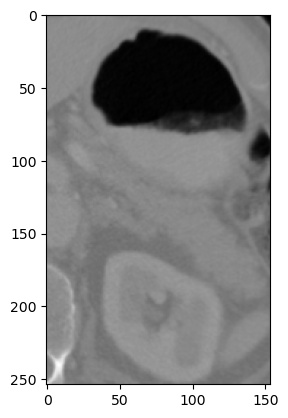

In [189]:
image = image[:,68:105,126:380,267:421]
plt.imshow(image[0,10,:,:], cmap='gray')

In [177]:
imag

torch.Size([37, 254, 154])

In [199]:

transform = Compose([SpatialPad((64,256,256)),RandSpatialCrop((64,256,256),random_size=False,random_center=True),RandZoom(prob=0.3, min_zoom=1.0, max_zoom=1.2),RandRotate(range_z=0.3,prob=0.5),RandFlip(prob=0.3),NormalizeIntensity(),ToTensor()])
transformed = transform(image)


In [200]:
transformed.shape

torch.Size([1, 64, 256, 256])

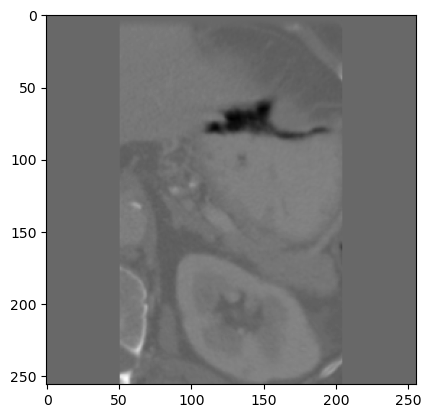

In [201]:
plt.imshow(transformed[0,32,:,:], cmap='gray')

# Selective net